# Experimental Data (Testing)

In [ ]:
import RAFT-master

In [13]:
from RAFT.core.update import BasicUpdateBlock, SmallUpdateBlock
from RAFT.core.extractor import BasicEncoder, SmallEncoder
from RAFT.core.corr import CorrBlock, AlternateCorrBlock
from RAFT.core.utils.utils import bilinear_sampler, coords_grid, upflow8, InputPadder

In [14]:
from RAFT.core.raft import RAFT

In [15]:
RAFT=RAFT()

In [16]:
RAFT=RAFT()
device='cuda'
RAFT.to(device)
#RAFT.eval()

RAFT(
  (fnet): BasicEncoder(
    (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (relu1): ReLU(inplace=True)
    (layer1): Sequential(
      (0): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU(inplace=True)
        (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (norm2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (1): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU(inplace=True)
        (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=Fa

In [10]:
192+128

320

In [10]:
x1=x[1].permute(2,0,1)[None].to(device)
x2=x[2].permute(2,0,1)[None].to(device)
padder = InputPadder(x2.shape)
image1, image2 = padder.pad(x1, x2)
image1.shape

torch.Size([1, 3, 384, 384])

In [10]:
import gc
torch.cuda.empty_cache()
gc.collect()

32

In [11]:
flow_low = RAFT(x[0:10].permute(0,3,1,2).to(device), x[10:20].permute(0,3,1,2).to(device), iters=2, test_mode=False)

C:\Users\marcb\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [12]:

flow_low.shape


torch.Size([500])

In [13]:
flow_low

tensor([-0.0695, -0.1510, -0.1290,  0.0145, -0.0501,  0.1263, -0.0495,  0.0478,
        -0.1509,  0.1126, -0.1249, -0.1496, -0.1569,  0.1267, -0.1094,  0.1413,
        -0.0405, -0.0020,  0.0871,  0.0613,  0.0191,  0.1152,  0.1373, -0.0059,
        -0.0369,  0.0170, -0.0393, -0.1259, -0.0228,  0.1319, -0.0980, -0.1459,
        -0.0054,  0.1365,  0.1465,  0.0114,  0.0344, -0.0090, -0.0533,  0.0538,
         0.0818,  0.0749,  0.0658,  0.0267, -0.1503, -0.0492, -0.0656, -0.1065,
        -0.1499,  0.0866, -0.0534, -0.0551,  0.0088,  0.1309,  0.0373, -0.0333,
         0.1427,  0.0960,  0.0218, -0.1400, -0.0112,  0.0527,  0.1009,  0.0704,
        -0.0303, -0.0565, -0.0986, -0.0335, -0.1180, -0.0476, -0.1022, -0.1103,
         0.1227,  0.0484, -0.1149,  0.1093, -0.0927,  0.0265,  0.1239, -0.0130,
         0.1163,  0.0663,  0.0126, -0.1144,  0.1273,  0.0034,  0.0034,  0.0665,
        -0.1571, -0.0111,  0.1501, -0.1057, -0.0044, -0.0471, -0.0355,  0.1112,
         0.1279,  0.0679,  0.0837, -0.13

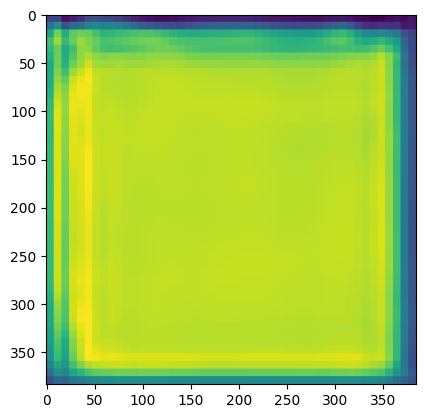

In [44]:
plt.imshow(flow_low_cat[0,0,:,:].detach().cpu().numpy())

In [10]:
base='C:/Users/marcb/Downloads/Acid_1ulh_8020/FR_1ulh_20X_25fps_1x1y_5min_001_frames/'
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
files=os.listdir(base)

full_files=[]
sorted_frames = sorted(files, key=lambda x: int(x[5:-4]))
for i in range(len(sorted_frames)):
    file = base+sorted_frames[i]
    full_files.append(file)

In [1]:
base='Paen_1ulh_pre/'
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
files=os.listdir(base)

full_files=[]
sorted_frames = sorted(files, key=lambda x: int(x[3:-4]))
for i in range(len(sorted_frames)):
    file = base+sorted_frames[i]
    full_files.append(file)

In [11]:
#torch.cuda.empty_cache()
import gc
gc.collect()

0

# Save Images

In [12]:
1600/40

40.0

In [23]:
import cv2
import numpy as np
from PIL import Image

k=4
l=2048
num_files = len(full_files)
#images = np.zeros([num_files-5, l, l], dtype='float32')
for i in range(1600):
    image1 = cv2.imread(full_files[i], cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(full_files[i+k], cv2.IMREAD_GRAYSCALE)
    tst=image2/255-image1/255
    tst[tst<0]=0
    tst=(tst-np.min(tst))/(np.max(tst)-np.min(tst))
    img = Image.fromarray(tst)
    img.save("Acid_1ulh_pre/tst"+str(i)+".tif")
    #images[i]=tst
    

1.0

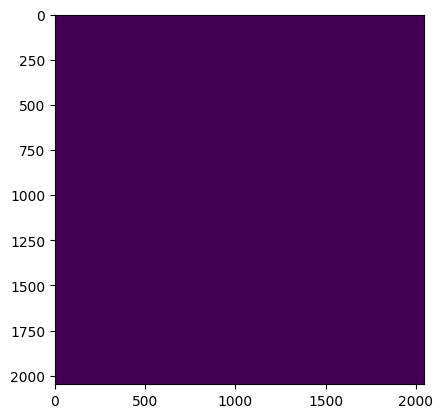

In [19]:
plt.imshow(images[500])
np.max(images[0])

# Load Test Images

In [12]:
full_files[0]

'Paen_5ulh_pre/tst0.tif'

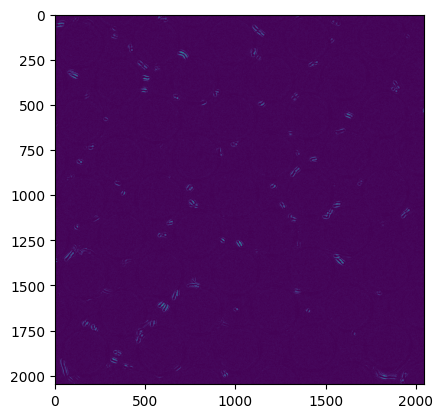

In [19]:
from PIL import Image
im=Image.open('C:\\Users\\marcb\\OneDrive\\Desktop\\het_trajectories\\DeepTrackStat\\Paen_5ulh_pre\\tst0.tif')
plt.imshow(np.array(im))

In [3]:
import cv2
import numpy as np
import cv2
from joblib import Parallel, delayed
l=384
from PIL import Image
# def process_file(file_path):
#     image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
#     resized_image = cv2.resize(image, [l, l])
#     return resized_image
def process_file(file_path):
    image = np.array(Image.open(file_path))
    resized_image = cv2.resize(image, [l, l])
    return resized_image

def parallel_image_processing(full_files):
    num_files = len(full_files)
    images = np.zeros([num_files, l, l])

    results = Parallel(n_jobs=16)(delayed(process_file)(file_path) for file_path in full_files)

    for i, resized_image in enumerate(results):
        images[i] = resized_image

    return images

images = parallel_image_processing(full_files)

In [4]:
import gc
gc.collect()

26

In [131]:
# k=5
# for i in range(k+1,len(images)):
#     tst=images[i]/255-images[i-k]/255
#     tst[tst<0]=0
#     tst=(tst-np.min(tst))/(np.max(tst)-np.min(tst))
#     images[i-k]=tst
    
    

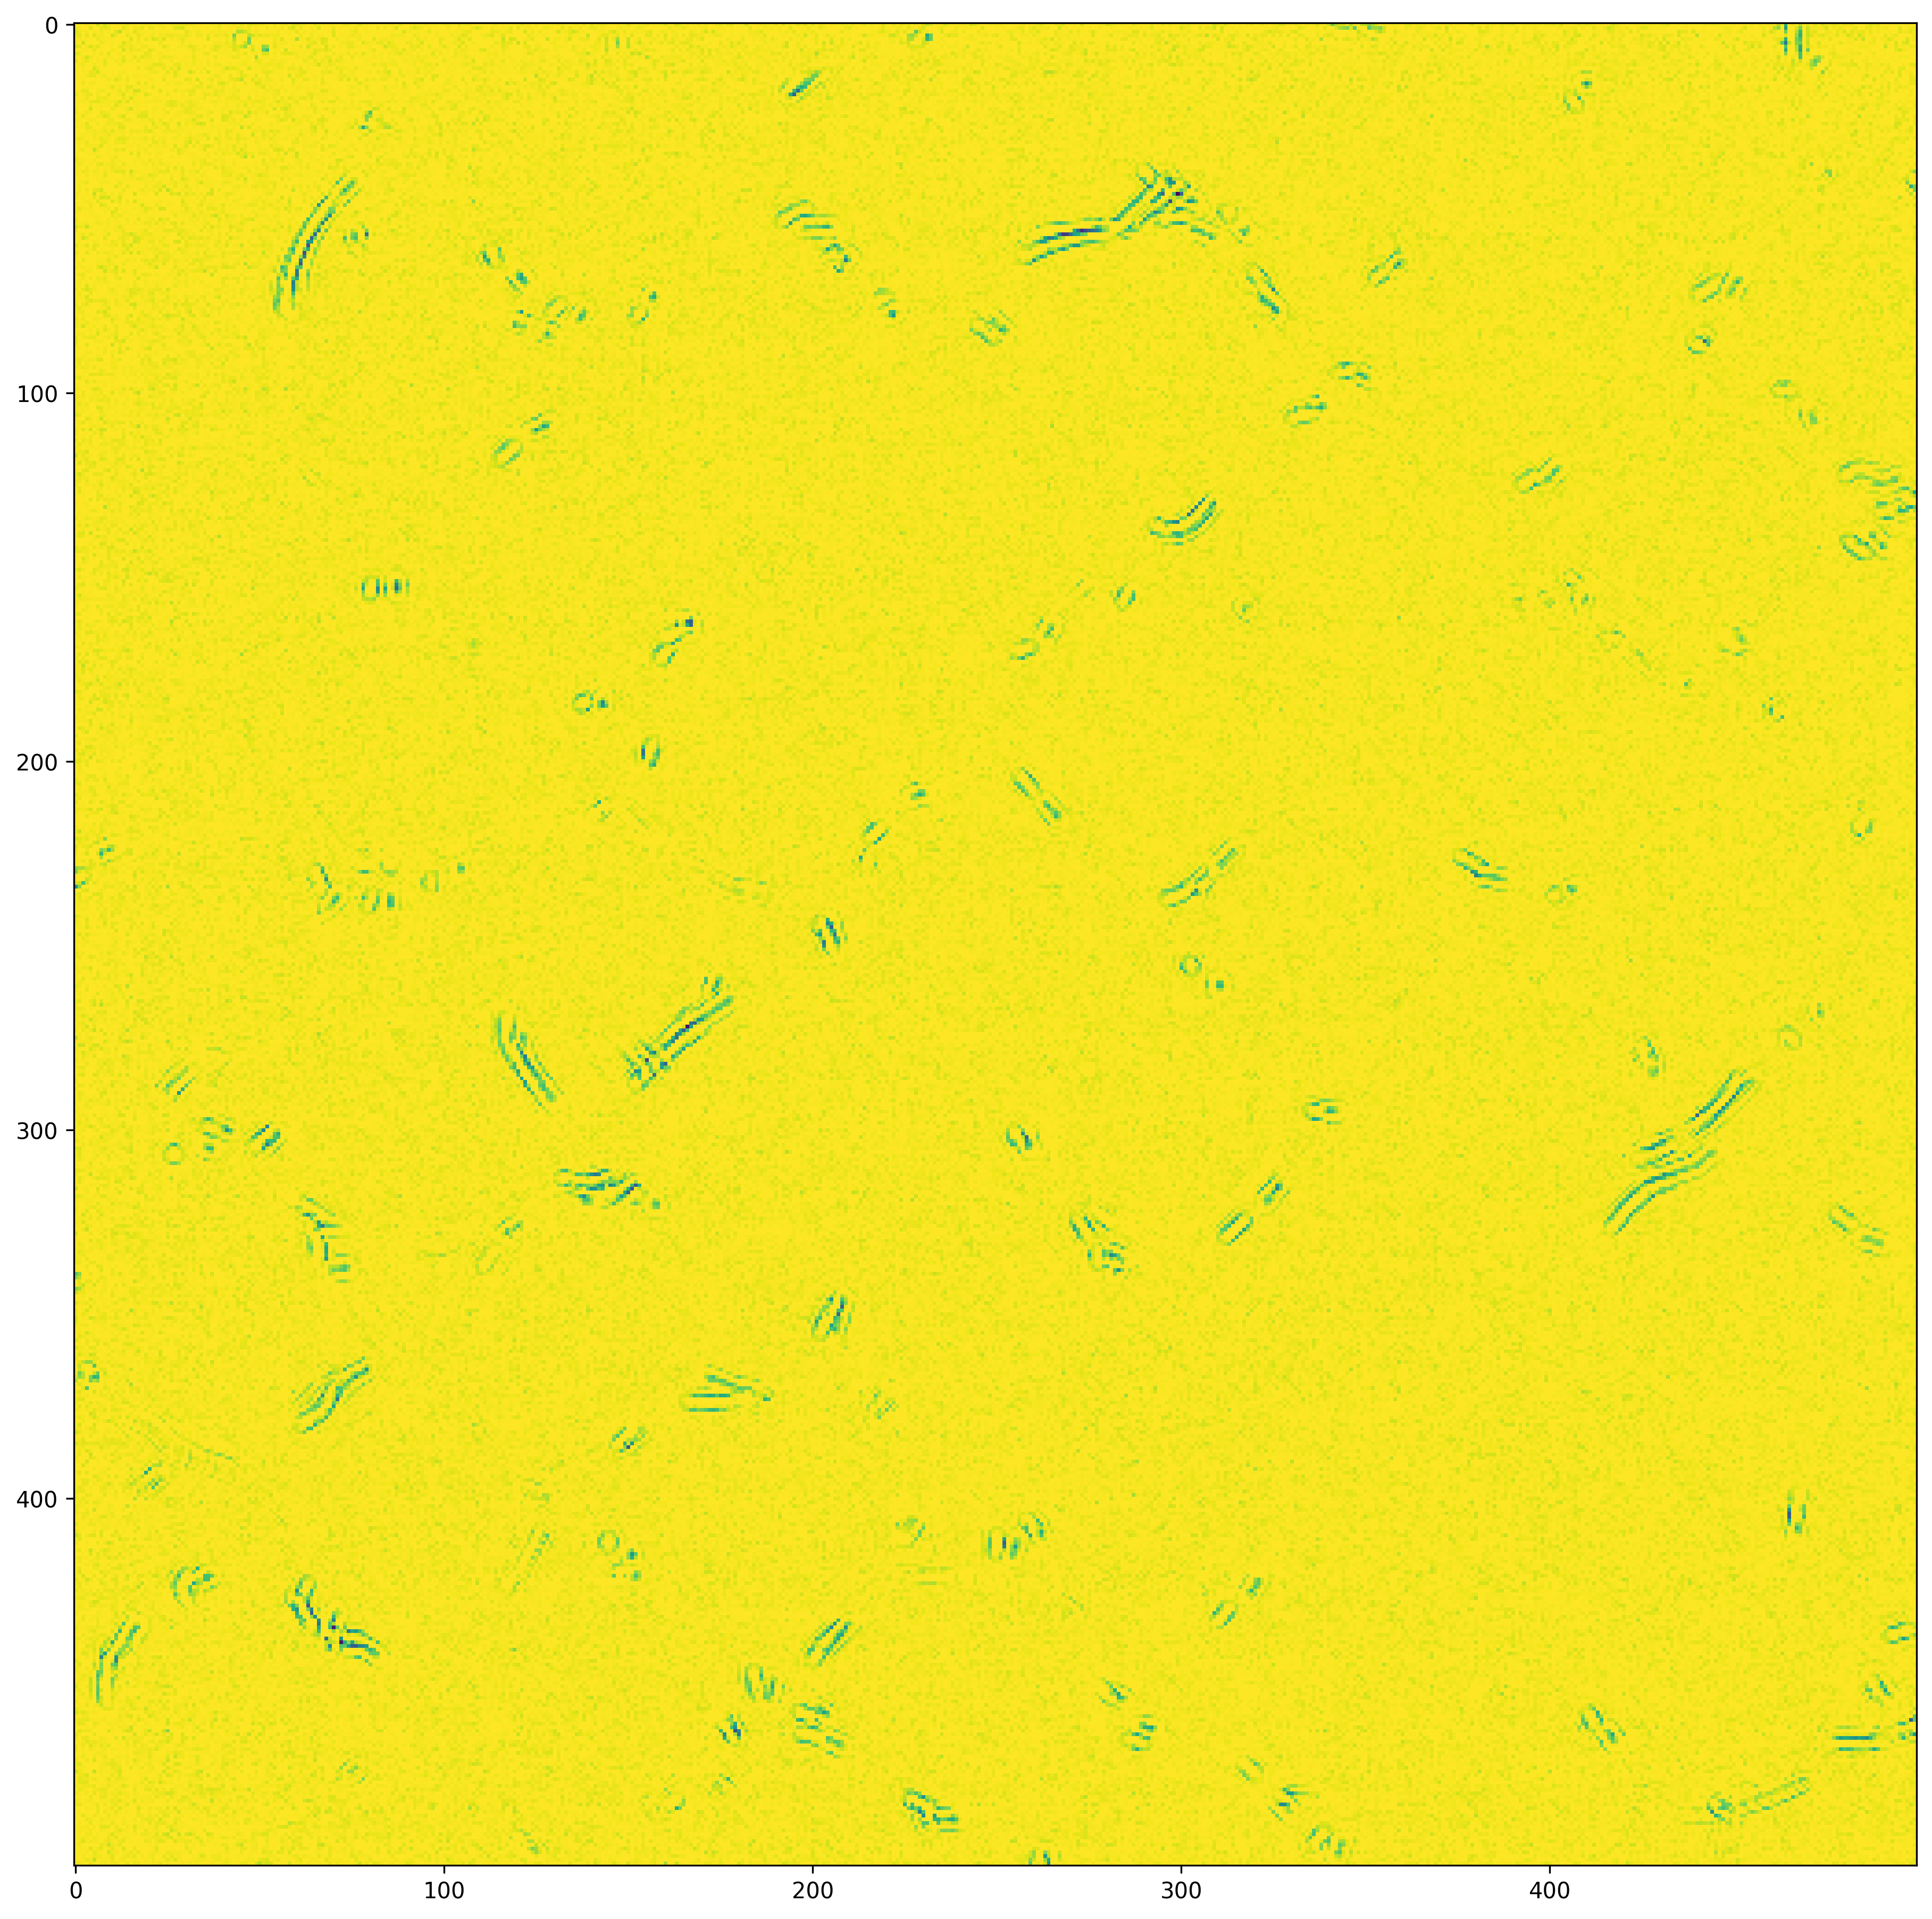

In [30]:
plt.figure(figsize=(15,15),dpi=300)
plt.imshow(images[-1])


In [5]:
for i in range(len(images)):
    images[i] = 1-images[i]
    

In [6]:
np.mean(images)

0.9854659910218939

In [7]:
from torch import nn
import torch.nn.functional as F


class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)

        # self.fc1=nn.Linear(4000,2000)
        # self.fc2 = nn.Linear(2000,1000)

        #self.fc3=nn.Linear(1000,1000)
        # self.fc3_2=nn.Linear(10,1)
        # self.fc4=nn.Linear(4000,10)
        # self.fc4_2=nn.Linear(10,1)
        # self.fc5=nn.Linear(4000,10)
        # self.fc5_2=nn.Linear(10,1)

    def forward(self, x):
        x = self.m1(x)
        
        # x = F.gelu(self.fc1(x))
        # x = self.fc2(x)
       # x = self.fc3(x)

        # x2 = F.gelu(self.fc3(x))
        # x2 = self.fc3_2(x2)
        # x3 = F.gelu(self.fc4(x))
        # x3 = self.fc4_2(x3)
        # x4 = F.gelu(self.fc5(x))
        # x4 = self.fc5_2(x4)

        return x#,x2,x3,x4
    

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'
# m1 = timm.create_model('regnety_016', in_chans=40, drop_path_rate=.0,num_classes=4000,pretrained=True)
# model=Net2()
# model.to(device)
# Define your custom dataset

class TestDataset2(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]

        return image.float()

In [9]:
model2 = Net0()
model2.load_state_dict(torch.load('speed_model_Volo384_dispBrown_full_new_v1'))
model2.to(device).eval()

model3 = Net0()
model3.load_state_dict(torch.load('speed_model_Volo384_dispBrown_fullv3'))
model3.to(device).eval()

Net0(
  (m1): VOLO(
    (patch_embed): PatchEmbed(
      (conv): Sequential(
        (0): Conv2d(40, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (8): ReLU(inplace=True)
      )
      (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (network): ModuleList(
      (0): Sequential(
        (0): Outlooker(
          (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
   

In [24]:
(images.shape[0]-22)/40

86.0

In [27]:
images.shape[0]

3462

In [28]:
images = images[:-22,:,:].reshape([(images.shape[0]-22)//40,40,384,384])
images.shape

torch.Size([86, 40, 384, 384])

C:\Users\marcb\AppData\Local\Temp\ipykernel_5512\1027870588.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images[:])


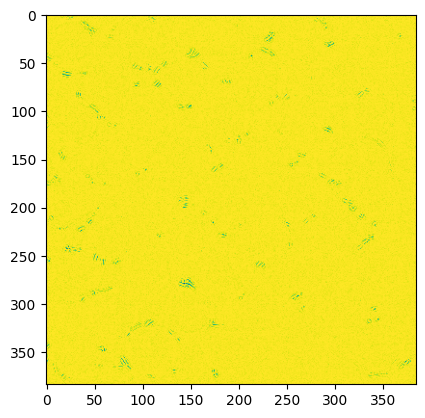

In [30]:
images = torch.tensor(images[:])
dataset_test = TestDataset2(images)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 12
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=True, num_workers=0)
x = next(iter(test_dataloader))
plt.imshow(x[0,39,:,:])

In [49]:
# import torchvision
# x2 = torchvision.transforms.functional.resize(x, 384)
# x2.shape
model

Twins(
  (patch_embeds): ModuleList(
    (0): PatchEmbed(
      (proj): Conv2d(40, 64, kernel_size=(4, 4), stride=(4, 4))
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (1): PatchEmbed(
      (proj): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    )
    (2): PatchEmbed(
      (proj): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
      (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
    (3): PatchEmbed(
      (proj): Conv2d(256, 512, kernel_size=(2, 2), stride=(2, 2))
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    )
  )
  (pos_drops): ModuleList(
    (0-3): 4 x Dropout(p=0.0, inplace=False)
  )
  (blocks): ModuleList(
    (0): ModuleList(
      (0): Block(
        (norm1): LayerNorm((64,), eps=1e-06, elementwise_affine=True)
        (attn): LocallyGroupedAttn(
          (qkv): Linear(in_features=64, out_features=192, bias=True)
     

In [31]:
import torchvision
outputs=[]
model2.eval()
#model2.eval()
#model3.eval()
with torch.no_grad():
    for x in test_dataloader:
       # x2 = torchvision.transforms.functional.resize(x, 384)
        #out10 = model2(x2.unsqueeze(0).to(device)).detach().cpu().numpy()
        out20 = model2(x.to(device)).detach().cpu().numpy()
        #out30 = model3(x2.unsqueeze(0).to(device)).detach().cpu().numpy()
        #out40 = (out10*0+out20*1+out30*1)/2
        outputs.append(out20)

In [13]:
x.unsqueeze(0).shape

torch.Size([1, 40, 384, 384])

In [33]:
out = np.reshape(np.hstack(outputs),[42000 ,])
out.shape

(42000,)

### Geobacter 1 = "out"

In [41]:
def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector

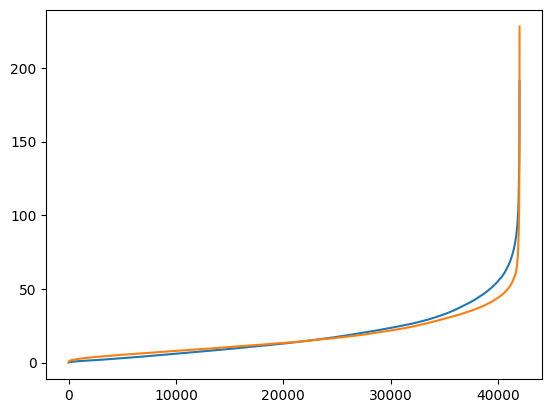

In [72]:
vels = interpolate_vectors(vels, len(out))
plt.plot(np.sort(out*.325/.1))
plt.plot(np.sort(vels))

In [51]:
np.sort(out*.325/.1)

array([3.5317261e-02, 9.4201759e-02, 9.8782778e-02, ..., 1.7133543e+02,
       1.8672266e+02, 1.9098663e+02], dtype=float32)

In [48]:
36*.325/.12

97.50000000000001

(2e-05, 0.1)

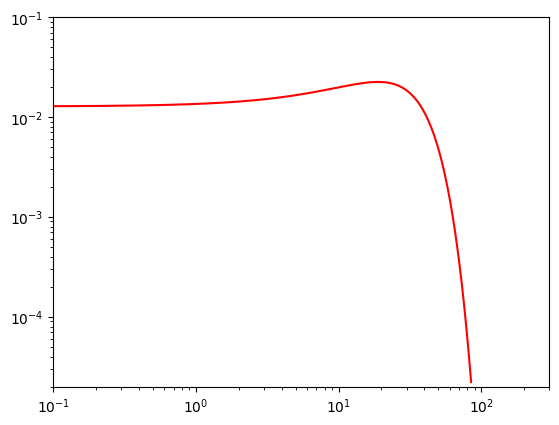

In [34]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(out*.325/.1))
xtorch= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
distr_torch=norm.pdf(xtorch, a,b)
plt.plot(xtorch,distr_torch,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1,3e2])
plt.ylim([2e-5,.1])

# Calculate Test Speeds

In [60]:
posx=posx*.325
posy=posy*.325
(np.sqrt(posx.diff()**2+posy.diff()**2)).dropna()

33969    0.613235
33970    0.754514
33971    1.061137
33972    0.379730
33973    1.221043
33974    3.453905
33975    3.249523
33976    0.545919
33977    1.348406
33978    0.537375
33979    1.672814
33980    0.175426
dtype: float64

In [52]:
df.POSITION_X[df.TRACK_ID==idx]

425187    1210.478527
425188    1219.157027
425189    1197.494992
425190    1261.337605
425191    1237.559282
425192    1225.963829
425193    1249.283871
425194    1273.169398
Name: POSITION_X, dtype: float64

In [62]:
df[df.TRACK_ID==idx].sort_values(by='FRAME')

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,VISIBILITY,MANUAL_SPOT_COLOR,MEAN_INTENSITY_CH1,MEDIAN_INTENSITY_CH1,MIN_INTENSITY_CH1,MAX_INTENSITY_CH1,TOTAL_INTENSITY_CH1,STD_INTENSITY_CH1,CONTRAST_CH1,SNR_CH1
149886,ID194183,194183,15819,0.000112,1119.710636,1314.296067,0.0,1311.0,1311,20.0,1,NaN,0.022021,0.0,0.0,0.246377,28.913044,0.036526,0.260469,0.249160
149884,ID193987,193987,15819,0.000124,1119.381371,1318.060855,0.0,1312.0,1312,20.0,1,NaN,0.021905,0.0,0.0,0.268657,28.761194,0.037615,0.242879,0.227603
149885,ID193600,193600,15819,0.000081,1120.255719,1318.786512,0.0,1313.0,1313,20.0,1,NaN,0.020541,0.0,0.0,0.212121,26.969698,0.034021,0.142132,0.150268
149882,ID194386,194386,15819,0.000187,1118.847138,1318.477675,0.0,1314.0,1314,20.0,1,NaN,0.030352,0.0,0.0,0.327869,39.852458,0.055168,0.256562,0.224670
149883,ID194786,194786,15819,0.000156,1120.091103,1317.139946,0.0,1315.0,1315,20.0,1,NaN,0.027031,0.0,0.0,0.372881,35.491525,0.049962,0.243532,0.211908
149887,ID194587,194587,15819,0.000120,1118.126442,1322.890470,0.0,1316.0,1316,20.0,1,NaN,0.023800,0.0,0.0,0.250000,31.250001,0.037679,0.221174,0.228810
149889,ID194985,194985,15819,0.000088,1118.501712,1321.296831,0.0,1317.0,1317,20.0,1,NaN,0.018605,0.0,0.0,0.185714,24.428572,0.030806,0.179142,0.183511
149888,ID195355,195355,15819,0.000153,1117.729904,1319.114802,0.0,1318.0,1318,20.0,1,NaN,0.022588,0.0,0.0,0.316456,29.658228,0.039109,0.321901,0.281291


In [65]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)[1]
print(filename)
df = pd.read_csv(os.path.join(directory,filename),header=0, skiprows=[1,2,3])
#df.Positio
tracks = df.TRACK_ID.unique()
vels=0.1
for i in range(len(tracks)):
    idx = tracks[i]
    posx = .325*df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_X
    posy = .325*df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_Y
    
    posx[posx==0]=np.nan
    posy[posy==0]=np.nan
    vel = (np.sqrt(posx.diff()**2+posy.diff()**2)/.12).dropna()
    if i%2000==0:
        print(vel)
    vels = np.hstack([vels, vel])

pean_5ulh_001.csv
4     11.704298
8      8.845125
0      4.011071
10     6.143972
6      1.649506
7      4.862866
9      2.248230
1      2.153959
3      4.723777
2      3.220932
dtype: float64
55716    17.261551
55734    13.976667
55710    23.007405
55723     9.051278
55733    27.902261
55743    16.517233
55713    13.266292
55736    26.881092
55741    11.683727
55729    26.323914
55720    20.075082
55735    14.197370
55742    10.646737
55718     7.540778
55728    12.760625
55711     9.117272
55739    10.372972
55731    10.807431
55717    13.379360
55724    14.073590
55726     7.630998
55714    15.757656
55721    24.162203
55727     7.817439
55715    22.474671
55722    21.032216
55732    16.752126
55737    37.706183
55712    27.200469
55725    18.959654
55738    33.499605
55719    24.638106
55730    19.852199
dtype: float64
103686     34.912138
103709     36.700049
103754    198.396989
103696     34.384098
103723     21.497030
             ...    
103735     27.949184
103749     22.8036

In [19]:
vel

425188     22.739183
425189     56.538080
425190    176.692137
425191     69.914985
425192     32.938716
425193     65.673987
425194     77.640709
dtype: float64

In [66]:
vels = vels[vels<800]
vels = vels[vels>0]
np.max(vels)
np.percentile(vels, 90)

36.703634678732556

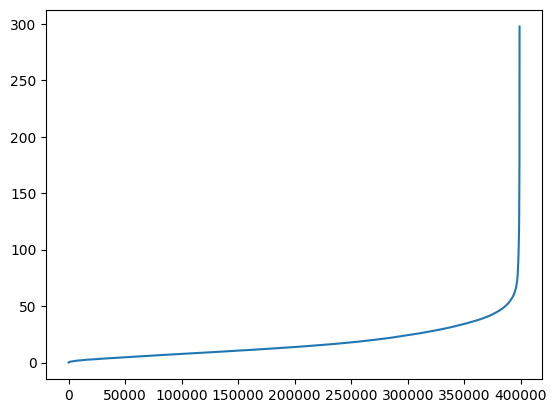

In [67]:
plt.plot(np.sort(vels))

In [22]:
del loc

(2e-05, 0.1)

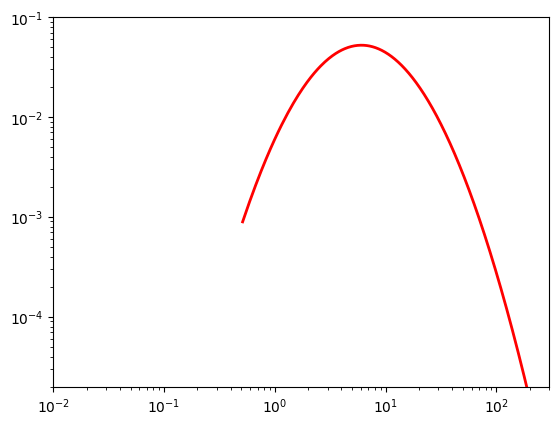

In [69]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

shape, loc2, scale2 = lognorm.fit(vels, floc=0)

# Generate x-values for the fitted PDF
x = np.linspace(lognorm.ppf(0.0001, shape, loc=loc2, scale=scale2),
                lognorm.ppf(0.9999, shape, loc=loc2, scale=scale2), 4000)

# Plot the fitted PDF
pdf_fitted = lognorm.pdf(x, shape, loc=loc2, scale=scale2)
plt.plot(x, pdf_fitted, 'r-', lw=2, label='Fitted PDF')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-2,3e2])
plt.ylim([2e-5,.1])

(2e-05, 0.02)

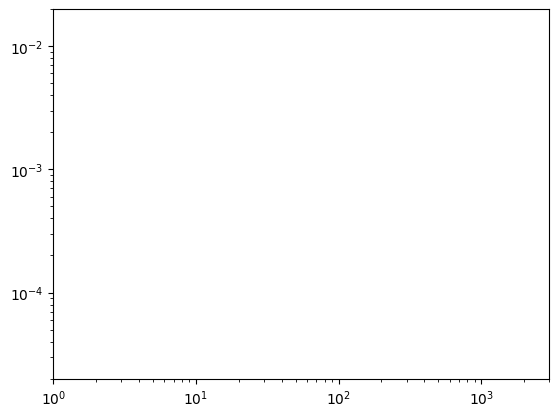

In [26]:
shape, loc2 = norm.fit(vels, floc=0)

# Generate x-values for the fitted PDF
x = np.linspace(norm.ppf(0.0001, shape,loc2),
                norm.ppf(0.9999, shape, loc2), 4000)

# Plot the fitted PDF
pdf_fitted = lognorm.pdf(x, shape, loc2)
plt.plot(x, pdf_fitted, 'r-', lw=2, label='Fitted PDF')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e0,3e3])
plt.ylim([2e-5,.02])

In [38]:
directory='../tmate_trajectories/'
for filename in os.listdir(directory):
    print ('Working on ' + str(filename))
    #if subc in filename:
    traj_stats=[]
    xc = pd.read_csv(os.path.join(directory,filename),header=None)
    new_fname='yc'+filename[2:]
    yc = pd.read_csv(os.path.join(directory,new_fname),header=None)
    xc[xc==0]=np.nan
    yc[yc==0]=np.nan
    frame_diff = 1
    for n in range(xc.shape[1]):
        x_diff = xc[n].diff()
        y_diff = yc[n].diff()
        vel=np.sqrt(x_diff**2+y_diff**2)
        angles=np.zeros((len(x_diff),1))
        for i in range(len(x_diff)-1):
            theta_1=np.arctan(y_diff.iloc[i]/x_diff.iloc[i])
            theta_2=np.arctan(y_diff.iloc[i+1]/x_diff.iloc[i+1])
            angles[i]=(theta_2-theta_1)*(180/np.pi)

        for count, val in enumerate (angles):
            if val==0:
                angles[count]=np.nan
        vel=vel[0:len(angles)]

        traj_stats.append([n, angles,vel])
    angle_array=[]
    vel_array=[]
    for i in range(len(traj_stats)):
        section1=traj_stats[i][1]
        section1=np.reshape(section1,(len(section1),))
        section2=traj_stats[i][2]
        section2=np.reshape(section2,(len(section2),))
        angle_array=np.hstack([section1,angle_array])
        vel_array=np.hstack([section2,vel_array])
        final_array=np.vstack([np.transpose(angle_array)[0:len(vel_array)],np.transpose(vel_array)])
    pd.DataFrame(np.transpose(final_array)).to_csv('vel'+str(filename))

Working on geo_5ulh_001.csv


C:\Users\marcb\AppData\Local\Temp\ipykernel_25140\2286195125.py:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  xc = pd.read_csv(os.path.join(directory,filename),header=None)


FileNotFoundError: [Errno 2] No such file or directory: '../tmate_trajectories/yco_5ulh_001.csv'

(2e-05, 0.1)

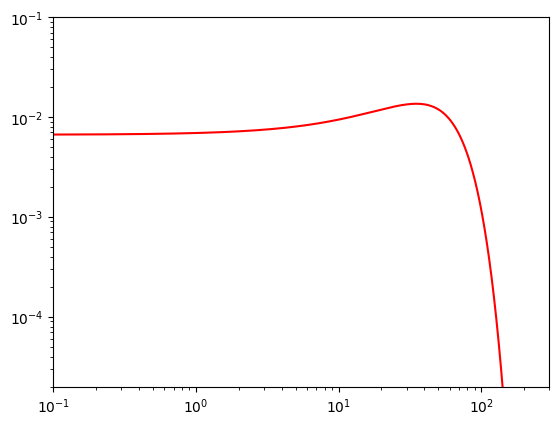

In [100]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(out*.325/.1))
xtorch= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
distr_torch=norm.pdf(xtorch, a,b)
plt.plot(xtorch,distr_torch,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1,3e2])
plt.ylim([2e-5,.1])

In [204]:
# from scipy.stats import exponweib,lognorm, beta, betaprime, norm

# a,b= norm.fit(np.sort(out*.325/.1))
# xtorch= np.linspace(norm.ppf(0.0001, a,b),
#                 norm.ppf(0.9999, a,b), 4000)
# distr_torch=norm.pdf(xtorch, a,b)
# plt.plot(xtorch,distr_torch,c='r')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim([1e-1,3e2])
# plt.ylim([1e-4,.1])

In [205]:
# from scipy.stats import exponweib,lognorm,johnsonsb
# a,b,c,d = johnsonsb.fit(np.sort(out*.325/.1))
# xtorch= np.linspace(johnsonsb.ppf(0.000001, a,b,c,d),
#                 johnsonsb.ppf(0.999999, a,b,c,d), 4000)
# distr_torch=johnsonsb.pdf(xtorch, a,b,c,d)
# plt.plot(xtorch,distr_torch,c='r')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim([1e-1,3e2])
# plt.ylim([1e-4,.1])

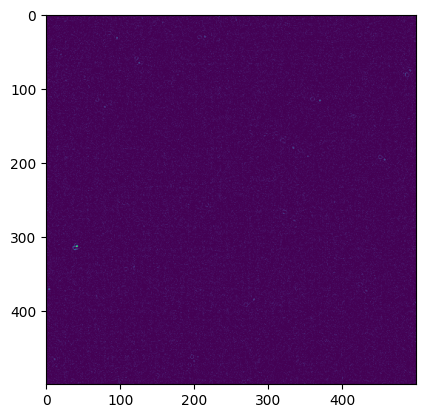

In [63]:
base='C:/Users/marcb/Downloads/Geo_5ulh_8020/FR_5ulh_20X_25fps_1x1y_5min_002_frames/'
files=os.listdir(base)
full_files=[]
sorted_frames = sorted(files, key=lambda x: int(x[5:-4]))
for i in range(len(sorted_frames)):
    file = base+sorted_frames[i]
    full_files.append(file)
import cv2
images = np.zeros([len(full_files), l, l])
images = parallel_image_processing(full_files)
#k=10
for i in range(k+1,len(images)):
    tst=images[i]/255-images[i-k]/255
    tst[tst<0]=0
    tst=(tst-np.min(tst))/(np.max(tst)-np.min(tst))
    images[i-k]=tst

images = torch.tensor(images[1:])
dataset_test = TestDataset2(images)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 40
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=True, num_workers=0)
x = next(iter(test_dataloader))
plt.imshow(x[0])

In [64]:
torch.mean(images[0])

tensor(0.0133, dtype=torch.float64)

In [65]:
outputs=[]
#model.eval()
with torch.no_grad():
    for x in test_dataloader:
        # x2 = torchvision.transforms.functional.resize(x, 384)
       # out10 = model2(x2.unsqueeze(0).to(device)).detach().cpu().numpy()
        out20 = model(x.unsqueeze(0).to(device)).detach().cpu().numpy()
       # out30 = model3(x2.unsqueeze(0).to(device)).detach().cpu().numpy()
        #out40 = (out10*0+out20*2+out30*1)/3
        outputs.append(out20)


In [66]:
out2 = np.reshape(np.hstack(outputs),[42000,])
out2.shape

(42000,)

(2e-05, 0.1)

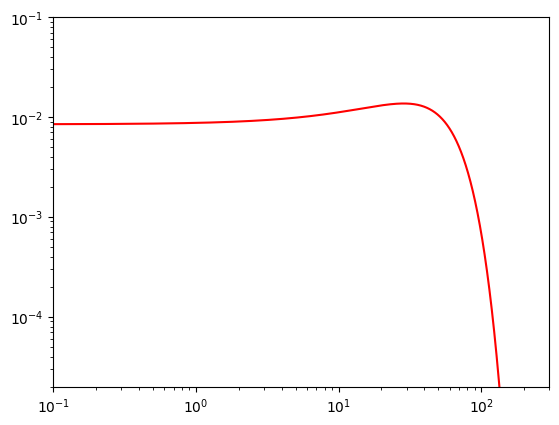

In [67]:
from scipy.stats import exponweib,lognorm, beta, betaprime
a,b = norm.fit(np.sort(out2*.325/.1))
xtorch2= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
distr_torch2=norm.pdf(xtorch2, a,b)
plt.plot(xtorch2,distr_torch2,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1,3e2])
plt.ylim([2e-5,.1])

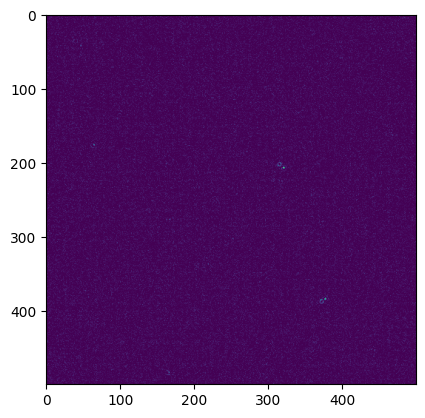

In [79]:
base='C:/Users/marcb/Downloads/Geo_5ulh_8020/FR_5ulh_20X_25fps_1x1y_5min_003_frames/'
files=os.listdir(base)
full_files=[]
sorted_frames = sorted(files, key=lambda x: int(x[5:-4]))
for i in range(len(sorted_frames)):
    file = base+sorted_frames[i]
    full_files.append(file)
import cv2

images = parallel_image_processing(full_files)
#k=6
for i in range(k+1,len(images)):
    tst=images[i]/255-images[i-k]/255
    tst[tst<0]=0
    tst=(tst-np.min(tst))/(np.max(tst)-np.min(tst))
    images[i-k]=tst

images = torch.tensor(images[1:])
dataset_test = TestDataset2(images)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 40
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=True, num_workers=0)
x = next(iter(test_dataloader))
plt.imshow(x[0])

In [80]:
x.shape

torch.Size([40, 500, 500])

In [81]:
outputs=[]
model.eval()
with torch.no_grad():
    for x in test_dataloader:
        # x2 = torchvision.transforms.functional.resize(x, 384)
        #out10 = model2(x2.unsqueeze(0).to(device)).detach().cpu().numpy()
        out20 = model(x.unsqueeze(0).to(device)).detach().cpu().numpy()
        #out30 = model3(x2.unsqueeze(0).to(device)).detach().cpu().numpy()
        #out40 = (out10*0+out20*2+out30*1)/3
        outputs.append(out20)

In [82]:
out3 = np.reshape(np.hstack(outputs),[39000,])
out3.shape

(39000,)

(0.0001, 0.1)

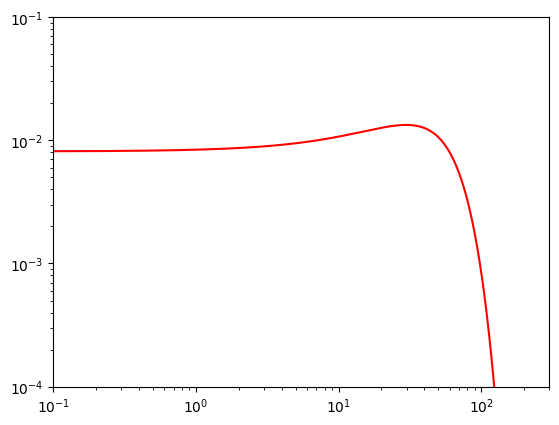

In [83]:
from scipy.stats import exponweib,lognorm,johnsonsu, levy, norm
a,b = norm.fit(np.sort(out3*.325/.1))
xtorch3= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
distr_torch3=norm.pdf(xtorch3, a,b)
plt.plot(xtorch3,distr_torch3,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1,3e2])
plt.ylim([1e-4,.1])

In [123]:
out_final = np.hstack([out, out2, out3])
#out_final[out_final<0]=0.0001
# out_final = out_final[out_final<800]
out_final = out_final[out_final>0]
out_final.shape

(124388,)

array([], dtype=float32)

In [110]:
geo_5ulh = pd.read_csv('geo_8020_5ulh_tmate.csv')
x_or = np.sort(np.reshape(np.array(geo_5ulh),[len(geo_5ulh),]))
x_or = x_or[x_or<800]
x_or

array([  0.        ,   0.        ,   0.        , ..., 791.36121694,
       792.03689187, 797.95512283])

(0.0001, 0.1)

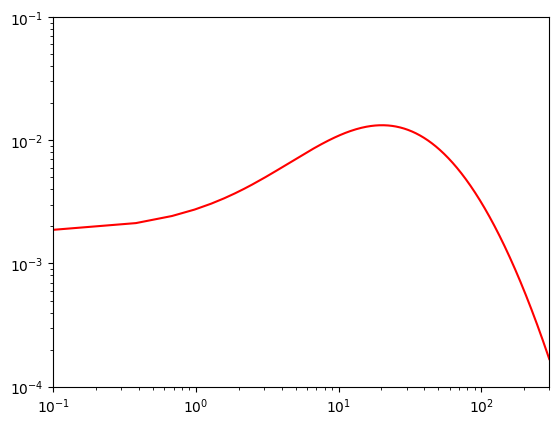

In [112]:
def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector
geo_5ulh = pd.read_csv('geo_8020_5ulh_tmate.csv')
x_or = np.sort(np.reshape(np.array(geo_5ulh),[len(geo_5ulh),]))
x_or = x_or[x_or<800]
x_or[x_or<=0]=0.0001
#x_or = interpolate_vectors(x_or, 5000000)

from scipy.stats import exponweib,lognorm,johnsonsu, levy, norm
a,b,c = lognorm.fit(x_or)
xtorch_or= np.linspace(lognorm.ppf(0.0001, a,b,c),
                lognorm.ppf(0.9999, a,b,c), 4000)
distr_torch_or=lognorm.pdf(xtorch_or, a,b,c)
plt.plot(xtorch_or,distr_torch_or,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1,3e2])
plt.ylim([1e-4,.1])

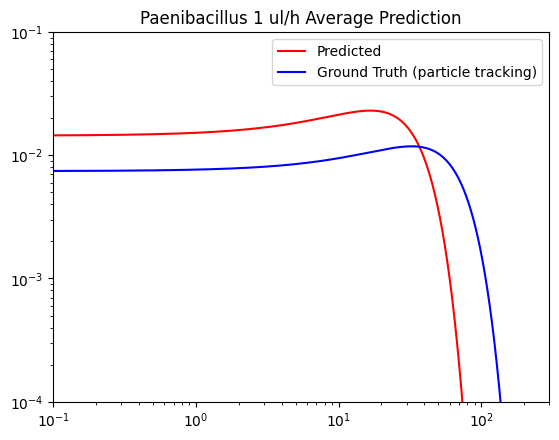

In [74]:
a,b = norm.fit(np.sort(out_final*.325/.1))
final_xtorch= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
final_distr_torch=norm.pdf(final_xtorch, a,b)
plt.plot(final_xtorch,final_distr_torch,c='r')
plt.plot(xtorch_or,distr_torch_or,c='b')
plt.xscale('log')
plt.yscale('log')
plt.title('Paenibacillus 1 ul/h Average Prediction')
plt.xlim([1e-1,3e2])
plt.ylim([1e-4,.1])
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

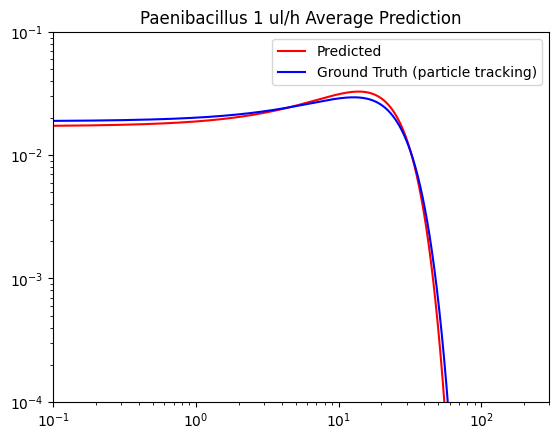

In [132]:
# final_xtorch = (xtorch+xtorch2+xtorch3)/3
# final_distr_torch = (distr_torch+distr_torch2+distr_torch3)/3
a,b = norm.fit(final_out)
final_xtorch= np.linspace(lognorm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
final_distr_torch=norm.pdf(final_xtorch, a,b)
plt.plot(final_xtorch,final_distr_torch,c='r')
plt.plot(xtorch_or,distr_torch_or,c='b')
plt.xscale('log')
plt.yscale('log')
plt.title('Paenibacillus 1 ul/h Average Prediction')
plt.xlim([1e-1,3e2])
plt.ylim([1e-4,.1])
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

array([-0.01522046, -0.00228938, -0.0504308 , -0.00871479, -0.03523164,
       -0.01406174, -0.02454408, -0.04582461, -0.00112152, -0.0600737 ,
       -0.0144355 , -0.06710797, -0.00718126, -0.04871037, -0.02146645,
       -0.04103405, -0.06021272, -0.00512524, -0.01657923, -0.00955185,
       -0.0718004 , -0.00766281, -0.01375025, -0.01296978, -0.01366075,
       -0.02927946, -0.01801529, -0.00236776, -0.00884828, -0.01169109,
       -0.00056436, -0.0379452 , -0.00878473, -0.05621245, -0.04179268,
       -0.00059359, -0.0558851 , -0.00069619, -0.01387843, -0.04709782,
       -0.01862719, -0.04492002, -0.06060051, -0.01031401, -0.00975262,
       -0.03496411, -0.02392064, -0.05599421, -0.02217611, -0.07510068,
       -0.02621237, -0.03111403, -0.02690098, -0.03161695, -0.01188034,
       -0.02480661, -0.04743081, -0.00219916, -0.03359153, -0.00468259,
       -0.02852874, -0.00603844, -0.0538884 , -0.04274817, -0.00670704,
       -0.03316241, -0.07679289, -0.03846818, -0.01125731, -0.01

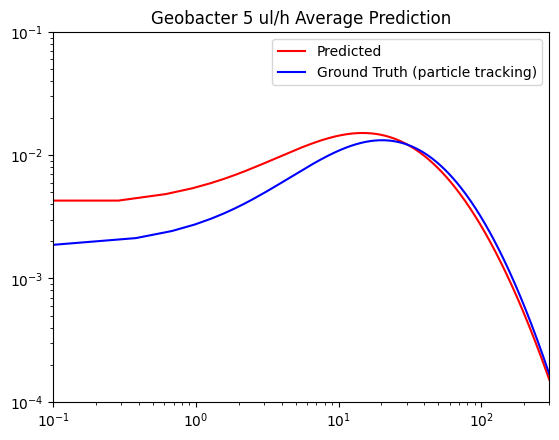

In [125]:
a,b,c = lognorm.fit(np.sort(out_final*.325/.05))
final_xtorch= np.linspace(lognorm.ppf(0.0001, a,b,c),
                lognorm.ppf(0.9999, a,b,c), 4000)
final_distr_torch=lognorm.pdf(final_xtorch, a,b,c)
plt.plot(final_xtorch,final_distr_torch,c='r')
plt.plot(xtorch_or,distr_torch_or,c='b')
plt.xscale('log')
plt.yscale('log')
plt.title('Geobacter 5 ul/h Average Prediction')
plt.xlim([1e-1,3e2])
plt.ylim([1e-4,.1])
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

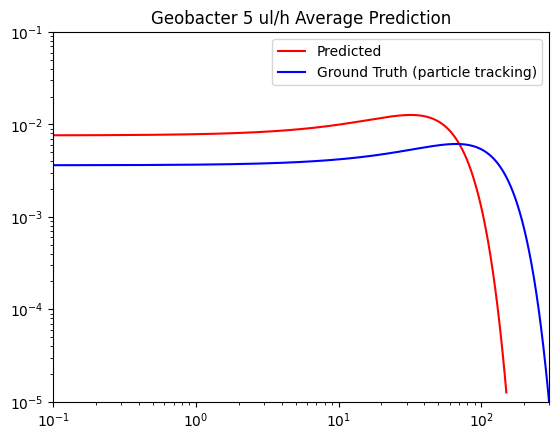

In [89]:
final_xtorch = (xtorch+xtorch2+xtorch3)/3
final_distr_torch = (distr_torch+distr_torch2+distr_torch3)/3
# a,b,c = lognorm.fit(final_out)
# xtorch= np.linspace(lognorm.ppf(0.01, a,b,c),
#                 lognorm.ppf(0.99, a,b,c), 4000)
# distr_torch=lognorm.pdf(xtorch, a,b,c)
plt.plot(final_xtorch,final_distr_torch,c='r')
plt.plot(xtorch_or,distr_torch_or,c='b')
plt.xscale('log')
plt.yscale('log')
plt.title('Geobacter 5 ul/h Average Prediction')
plt.xlim([1e-1,3e2])
plt.ylim([1e-5,.1])
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

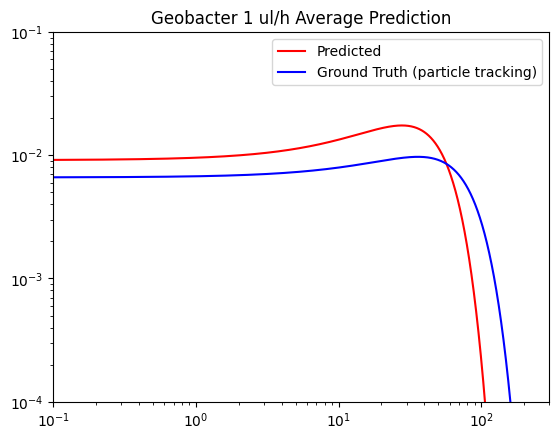

In [266]:
final_xtorch = (xtorch+xtorch2+xtorch3)/3
final_distr_torch = (distr_torch+distr_torch2+distr_torch3)/3
# a,b,c = lognorm.fit(final_out)
# xtorch= np.linspace(lognorm.ppf(0.01, a,b,c),
#                 lognorm.ppf(0.99, a,b,c), 4000)
# distr_torch=lognorm.pdf(xtorch, a,b,c)
plt.plot(final_xtorch,final_distr_torch,c='r')
plt.plot(xtorch_or,distr_torch_or,c='b')
plt.xscale('log')
plt.yscale('log')
plt.title('Geobacter 1 ul/h Average Prediction')
plt.xlim([1e-1,3e2])
plt.ylim([1e-4,.1])
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

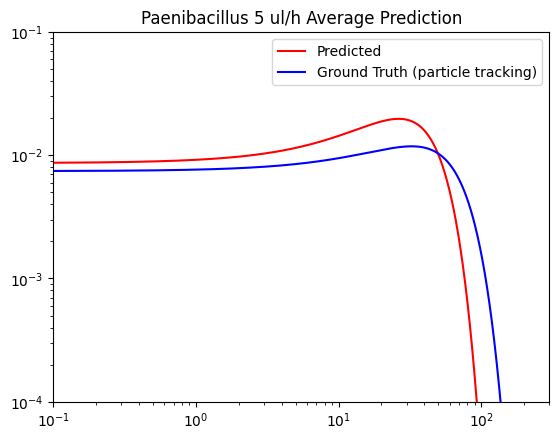

In [322]:
final_xtorch = (xtorch+xtorch2+xtorch3)/3
final_distr_torch = (distr_torch+distr_torch2+distr_torch3)/3
# a,b,c = lognorm.fit(final_out)
# xtorch= np.linspace(lognorm.ppf(0.01, a,b,c),
#                 lognorm.ppf(0.99, a,b,c), 4000)
# distr_torch=lognorm.pdf(xtorch, a,b,c)
plt.plot(final_xtorch,final_distr_torch,c='r')
plt.plot(xtorch_or,distr_torch_or,c='b')
plt.xscale('log')
plt.yscale('log')
plt.title('Paenibacillus 5 ul/h Average Prediction')
plt.xlim([1e-1,3e2])
plt.ylim([1e-4,.1])
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

In [172]:
80*2**(5/4.2737)

180.00267189574134

In [175]:
np.log(2)/.173

4.006631101502574

In [183]:
120-((120*np.e**-.865)*2.2)/1.2

27.368658421989323

In [185]:
120-110/1.2

28.33333333333333

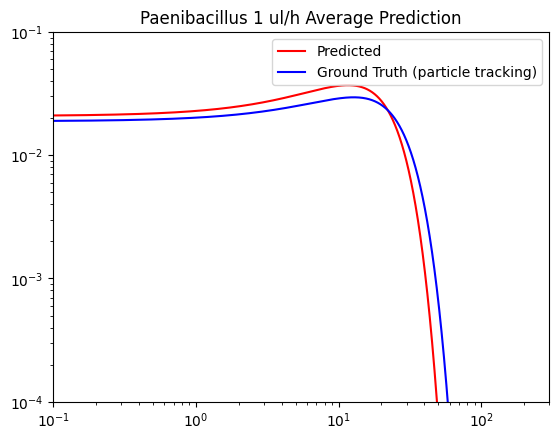

In [46]:
final_xtorch = (xtorch+xtorch2+xtorch3)/3
final_distr_torch = (distr_torch+distr_torch2+distr_torch3)/3
# a,b,c = lognorm.fit(final_out)
# xtorch= np.linspace(lognorm.ppf(0.01, a,b,c),
#                 lognorm.ppf(0.99, a,b,c), 4000)
# distr_torch=lognorm.pdf(xtorch, a,b,c)
plt.plot(final_xtorch,final_distr_torch,c='r')
plt.plot(xtorch_or,distr_torch_or,c='b')
plt.xscale('log')
plt.yscale('log')
plt.title('Paenibacillus 1 ul/h Average Prediction')
plt.xlim([1e-1,3e2])
plt.ylim([1e-4,.1])
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

In [ ]:
final_xtorch = (xtorch+xtorch2+xtorch3)/3
final_distr_torch = (distr_torch+distr_torch2+distr_torch3)/3
# a,b,c = lognorm.fit(final_out)
# xtorch= np.linspace(lognorm.ppf(0.01, a,b,c),
#                 lognorm.ppf(0.99, a,b,c), 4000)
# distr_torch=lognorm.pdf(xtorch, a,b,c)
plt.plot(final_xtorch,final_distr_torch,c='r')
plt.xscale('log')
plt.yscale('log')
plt.title('Geobacter 5 ul/h Average Prediction')
plt.xlim([1e-1,3e2])
plt.ylim([1e-4,.1])

In [ ]:
np.sort(np.reshape(np.array(geo_5ulh),[646375 ,])).shape

In [ ]:

def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector
geo_5ulh = pd.read_csv('paen_8020_1ulh_tmate.csv')
x_or = np.sort(np.reshape(np.array(geo_5ulh),[646375,]))
x_or = x_or[x_or<800]
x_or = x_or[x_or>0]
#x_or = interpolate_vectors(x_or, 5000000)

from scipy.stats import exponweib,lognorm,johnsonsu, levy, norm
a,b = norm.fit(x_or)
xtorch_or= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
distr_torch_or=norm.pdf(xtorch_or, a,b)
plt.plot(xtorch_or,distr_torch_or,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1,3e2])
plt.ylim([1e-4,.1])

In [ ]:
plt.plot(np.sort(out3*.325/.1))
plt.plot(x_or)

In [ ]:
# from scipy.stats import exponweib,lognorm,johnsonsu, levy, norm
# a,b= norm.fit(np.sort(out3*.325/.1))
# xtorch3= np.linspace(norm.ppf(0.0001, a,b),
#                 norm.ppf(0.9999, a,b), 4000)
# distr_torch3=norm.pdf(xtorch3, a,b)
# plt.plot(xtorch3,distr_torch3,c='r')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim([1e-1,3e2])
# plt.ylim([1e-4,.1])

In [ ]:
np.sort(np.reshape(np.array(geo_5ulh),[646375 ,]))

In [ ]:
# geo_5ulh = pd.read_csv('paen_8020_1ulh_tmate.csv')
from scipy.stats import exponweib,lognorm,johnsonsu, levy, norm
a,b = norm.fit(x_or)
xtorch_or= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
distr_torch_or=norm.pdf(xtorch_or, a,b)
plt.plot(xtorch_or,distr_torch_or,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1,3e2])
plt.ylim([1e-4,.1])

In [ ]:
xtorch_or

In [ ]:
final_xtorch = (xtorch+xtorch2+xtorch3)/3
final_distr_torch = (distr_torch+distr_torch2+distr_torch3)/3
# a,b,c = lognorm.fit(final_out)
# xtorch= np.linspace(lognorm.ppf(0.01, a,b,c),
#                 lognorm.ppf(0.99, a,b,c), 4000)
# distr_torch=lognorm.pdf(xtorch, a,b,c)
plt.plot(final_xtorch,final_distr_torch,c='r')
plt.xscale('log')
plt.yscale('log')

# Model Training

In [1]:
import os

sim_dir = os.listdir('all_sims')
file_dir = os.listdir('all_traj_files')
# Custom sorting key function
def sort_key(item):
    if '_brown' in item:
        return (1, int(item[3:-6]))
    else:
        return (0, int(item[3:]))

# Sort the list using the custom key
sorted_sim_dir = sorted(sim_dir, key=sort_key)

print(sorted_sim_dir)

['sim61', 'sim62', 'sim63', 'sim64', 'sim65', 'sim66', 'sim67', 'sim68', 'sim69', 'sim70', 'sim71', 'sim72', 'sim73', 'sim74', 'sim75', 'sim76', 'sim77', 'sim78', 'sim79', 'sim80', 'sim81', 'sim82', 'sim83', 'sim84', 'sim85', 'sim86', 'sim87', 'sim88', 'sim89', 'sim90', 'sim91', 'sim92', 'sim93', 'sim94', 'sim95', 'sim96', 'sim97', 'sim98', 'sim99', 'sim100', 'sim101', 'sim102', 'sim103', 'sim104', 'sim105', 'sim106', 'sim107', 'sim108', 'sim109', 'sim110', 'sim111', 'sim112', 'sim113', 'sim114', 'sim115', 'sim116', 'sim117', 'sim118', 'sim119', 'sim120', 'sim121', 'sim122', 'sim123', 'sim124', 'sim125', 'sim126', 'sim127', 'sim128', 'sim129', 'sim130', 'sim131', 'sim132', 'sim133', 'sim134', 'sim135', 'sim136', 'sim137', 'sim138', 'sim139', 'sim140', 'sim141', 'sim142', 'sim143', 'sim144', 'sim145', 'sim146', 'sim147', 'sim148', 'sim149', 'sim150', 'sim151', 'sim152', 'sim153', 'sim154', 'sim155', 'sim156', 'sim157', 'sim158', 'sim159', 'sim161', 'sim162', 'sim163', 'sim164', 'sim165'

In [2]:
import os


# Custom sorting key function
def sort_key2(item):
    if '_brown' in item:
        return (1, int(item[6:-10]))  # Extract the numeric part for files with '_brown'
    else:
        return (0, int(item[6:-4]))  # Extract the numeric part for files without '_brown'

# Sort the list using the custom key
sorted_file_dir = sorted(file_dir, key=sort_key2)

# Split the sorted list into 'yc_' and 'xc_' files
yc_files = [f for f in sorted_file_dir if f.startswith('yc_')]
xc_files = [f for f in sorted_file_dir if f.startswith('xc_')]

# Create a list of lists with corresponding 'yc_' and 'xc_' files
sorted_file_pairs = [[yc, xc] for yc, xc in zip(yc_files, xc_files)]

print(sorted_file_pairs)

[['yc_sim61.csv', 'xc_sim61.csv'], ['yc_sim62.csv', 'xc_sim62.csv'], ['yc_sim63.csv', 'xc_sim63.csv'], ['yc_sim64.csv', 'xc_sim64.csv'], ['yc_sim65.csv', 'xc_sim65.csv'], ['yc_sim66.csv', 'xc_sim66.csv'], ['yc_sim67.csv', 'xc_sim67.csv'], ['yc_sim68.csv', 'xc_sim68.csv'], ['yc_sim69.csv', 'xc_sim69.csv'], ['yc_sim70.csv', 'xc_sim70.csv'], ['yc_sim71.csv', 'xc_sim71.csv'], ['yc_sim72.csv', 'xc_sim72.csv'], ['yc_sim73.csv', 'xc_sim73.csv'], ['yc_sim74.csv', 'xc_sim74.csv'], ['yc_sim75.csv', 'xc_sim75.csv'], ['yc_sim76.csv', 'xc_sim76.csv'], ['yc_sim77.csv', 'xc_sim77.csv'], ['yc_sim78.csv', 'xc_sim78.csv'], ['yc_sim79.csv', 'xc_sim79.csv'], ['yc_sim80.csv', 'xc_sim80.csv'], ['yc_sim81.csv', 'xc_sim81.csv'], ['yc_sim82.csv', 'xc_sim82.csv'], ['yc_sim83.csv', 'xc_sim83.csv'], ['yc_sim84.csv', 'xc_sim84.csv'], ['yc_sim85.csv', 'xc_sim85.csv'], ['yc_sim86.csv', 'xc_sim86.csv'], ['yc_sim87.csv', 'xc_sim87.csv'], ['yc_sim88.csv', 'xc_sim88.csv'], ['yc_sim89.csv', 'xc_sim89.csv'], ['yc_sim90.cs

In [3]:
test_dirs = sorted_file_pairs[0::5]
len(test_dirs)

107

In [4]:
train_dirs = sorted_file_pairs[1::5]+sorted_file_pairs[2::5]+sorted_file_pairs[3::5]+sorted_file_pairs[4::5]#+sorted_file_pairs[5::6]
len(train_dirs)

428

In [5]:
test_image_files = sorted_sim_dir[0::5]
len(test_image_files)

107

In [6]:
train_image_files = sorted_sim_dir[1::5]+sorted_sim_dir[2::5]+sorted_sim_dir[3::5]+sorted_sim_dir[4::5]#+sorted_sim_dir[5::6]

len(train_image_files)

428

In [7]:
import pandas as pd
import numpy as np
import cv2
import os
import torch
import re
#torch.set_default_dtype(torch.float16)



# train_image_files=['../500part_4xspeed_heterogeneous/','../2000part_4xspeed_heterogeneous/', '../2000part_16xspeed_heterogeneous/',
#                   '../2000part_32xspeed_heterogeneous/','../1000part_16xspeed_heterogeneous/','../500part_32xspeed_heterogeneous/',
#                   '../1000part_32xspeed_heterogeneous/', 'sim2/', 'sim11/', 'sim12/', 'sim13/', 'sim14/', 'sim19/','sim20/','sim21/',
#                    'sim22/','sim23/','sim24/','sim25/','sim35/','sim36/','sim46/','sim62/','sim63/','sim64/','sim65/','sim66/',
#                   'sim67/','sim16/']
# train_image_files=['sim62/','sim63/','sim64/','sim66/',
#                   'sim67/','sim68/','sim69/', 'sim72/','sim73/','sim74/','sim76/',
#                   'sim77/','sim78/','sim79/', 'sim82/','sim83/','sim84/','sim86/',
#                   'sim87/','sim88/','sim89/', 'sim92/','sim93/','sim94/','sim96/',
#                   'sim97/','sim98/','sim99/', 'sim102/','sim103/','sim104/','sim106/',
#                   'sim107/','sim108/','sim109/', 'sim112/','sim113/','sim114/','sim116/',
#                   'sim117/','sim118/','sim119/', 'sim122/','sim123/','sim124/','sim116/',
#                   'sim117/','sim118/','sim119/', 'sim132/','sim133/','sim134/','sim116/',
#                   'sim117/','sim118/','sim119/', 'sim142/','sim143/','sim144/','sim116/',
#                   'sim117/','sim118/','sim119/', 'sim112/','sim113/','sim114/','sim116/',
#                   'sim117/','sim118/','sim119/', 'sim112/','sim113/','sim114/','sim116/',
#                   'sim117/','sim118/','sim119/']
# test_image_files=['sim61/','sim65/','sim70/','sim71/','sim75/','sim80/','sim81/','sim85/','sim90/',
#                   'sim91/','sim95/','sim100/','sim101/','sim105/','sim110/','sim111/','sim115/','sim120/']
s=500
k=40
images_train = torch.zeros(len(train_image_files),k,s, s)
images_test = torch.zeros(len(test_image_files),k,s, s)
for i in range(len(train_image_files)):
    base = 'all_sims/'+train_image_files[i]
    im_dir = os.listdir(base)
    im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
    for j in range(k):
        images_train[i,j,:,:] = torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))


for i in range(len(test_image_files)):
    base = 'all_sims/'+test_image_files[i]
    im_dir = os.listdir(base)
    im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
    for j in range(k):
        images_test[i,j,:,:] = torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))
        
im_dir

['Fig_1.jpg',
 'Fig_2.jpg',
 'Fig_3.jpg',
 'Fig_4.jpg',
 'Fig_5.jpg',
 'Fig_6.jpg',
 'Fig_7.jpg',
 'Fig_8.jpg',
 'Fig_9.jpg',
 'Fig_10.jpg',
 'Fig_11.jpg',
 'Fig_12.jpg',
 'Fig_13.jpg',
 'Fig_14.jpg',
 'Fig_15.jpg',
 'Fig_16.jpg',
 'Fig_17.jpg',
 'Fig_18.jpg',
 'Fig_19.jpg',
 'Fig_20.jpg',
 'Fig_21.jpg',
 'Fig_22.jpg',
 'Fig_23.jpg',
 'Fig_24.jpg',
 'Fig_25.jpg',
 'Fig_26.jpg',
 'Fig_27.jpg',
 'Fig_28.jpg',
 'Fig_29.jpg',
 'Fig_30.jpg',
 'Fig_31.jpg',
 'Fig_32.jpg',
 'Fig_33.jpg',
 'Fig_34.jpg',
 'Fig_35.jpg',
 'Fig_36.jpg',
 'Fig_37.jpg',
 'Fig_38.jpg',
 'Fig_39.jpg',
 'Fig_40.jpg']

torch.Size([428, 40, 500, 500])

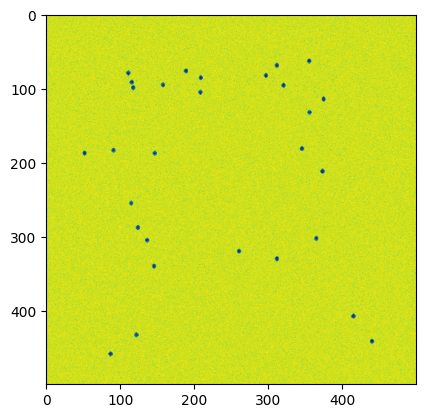

In [8]:
import matplotlib.pyplot as plt
plt.imshow(images_train[100,30,:,:])
images_train.shape

In [9]:
import gc
del im_dir
gc.collect()

2737

In [11]:
import pandas as pd
import numpy as np
import cv2
import os
import torch
import re
import matplotlib.pyplot as plt
from scipy.stats import exponweib,lognorm

def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector
    

base='all_traj_files/'
target_length=500
speeds = torch.zeros(len(train_dirs),target_length)
for i in range(len(train_dirs)):
    x_arr= np.array(pd.read_csv(base+train_dirs[i][1], header=None))
    y_arr= np.array(pd.read_csv(base+train_dirs[i][0], header=None))
    vx = np.diff(x_arr, axis=0)
    vy = np.diff(y_arr, axis=0)
    speed = np.sqrt(vx**2+vy**2)
    speed = np.reshape(speed, [-1])
    speed=speed[~np.isnan(speed)]
    speed[speed<=0]=0.0001
    speed = interpolate_vectors(np.sort(speed), target_length)
    speeds[i,:] = torch.tensor(speed)


In [12]:
# xtorch_test = torch.zeros(len(test_dirs),1000)
# distr_torch_test = torch.zeros(len(test_dirs),1000)

# test_dirs=[["xc_1000part_4xspeed.csv","yc_1000part_4xspeed.csv"],["xc_500part_16xspeed.csv","yc_500part_16xspeed.csv"],
#           ['yc_sim17.csv','xc_sim17.csv'],['yc_sim18.csv','xc_sim18.csv'], ['yc_sim40.csv','xc_sim40.csv'], ['yc_sim41.csv','xc_sim41.csv'], 
#            ['yc_sim42.csv','xc_sim42.csv'], ['yc_sim43.csv','xc_sim43.csv'], ['yc_sim44.csv','xc_sim44.csv'], ['yc_sim45.csv','xc_sim45.csv'],
#            ['yc_sim69.csv','xc_sim69.csv'],['yc_sim70.csv','xc_sim70.csv'],
# ]
# test_dirs=[ ['yc_sim61.csv','xc_sim61.csv'], ['yc_sim65.csv','xc_sim65.csv'],['yc_sim70.csv','xc_sim70.csv'],
#            ['yc_sim71.csv','xc_sim71.csv'], ['yc_sim75.csv','xc_sim75.csv'],['yc_sim80.csv','xc_sim80.csv'],
#            ['yc_sim81.csv','xc_sim81.csv'], ['yc_sim85.csv','xc_sim85.csv'],['yc_sim90.csv','xc_sim90.csv'],
# ]
# scales_test = torch.zeros(len(test_dirs),3)
# target_length=1000
speeds_test = torch.zeros(len(test_dirs),target_length)
for i in range(len(test_dirs)):
    x_arr= np.array(pd.read_csv(base+test_dirs[i][1], header=None))
    y_arr= np.array(pd.read_csv(base+test_dirs[i][0], header=None))
    vx = np.diff(x_arr, axis=0)
    vy = np.diff(y_arr, axis=0)
    speed = np.sqrt(vx**2+vy**2)
    speed = np.reshape(speed, [-1])
    speed=speed[~np.isnan(speed)]
    speed[speed<=0]=0.0001
    speed = interpolate_vectors(np.sort(speed), target_length)
    speeds_test[i,:] = torch.tensor(speed)


In [13]:
import timm
timm.list_models()

tensor([[2.7144e-02, 3.0194e-01, 4.1168e-01,  ..., 1.0537e+02, 1.1465e+02,
         1.6686e+02],
        [7.3393e-02, 2.6001e-01, 3.8026e-01,  ..., 4.0262e+01, 4.4238e+01,
         5.6582e+01],
        [1.0004e-01, 2.1359e-01, 3.6561e-01,  ..., 2.3675e+01, 2.7716e+01,
         3.2391e+01],
        ...,
        [6.1893e-02, 3.5191e-01, 4.5334e-01,  ..., 2.2588e+01, 2.3252e+01,
         2.6927e+01],
        [3.0859e-01, 4.5549e-01, 6.2111e-01,  ..., 2.6482e+01, 2.7410e+01,
         2.8636e+01],
        [9.2037e-03, 1.6254e-01, 2.5107e-01,  ..., 1.0852e+01, 1.1649e+01,
         1.4482e+01]])

In [14]:
from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        l=200
        self.fc2=nn.Conv2d(100, l, 1, stride=2)
        #self.m1 = nn.BatchNorm1d(1000)
        self.d1 = nn.Dropout(.2)
        self.fc1=nn.Conv2d(40, 100, 1, stride=2)
        #self.m2 = nn.BatchNorm1d(l)
        self.d2 = nn.Dropout(.2)
       # self.fc2 = nn.Linear(800,l)
       # self.fc3=nn.Linear(2000,800)
       # self.fc4 = nn.Linear(800,l)
        self.fc5 = nn.Conv2d(l, 5,1, stride=1)
        #self.m3 = nn.BatchNorm1d(100)
        self.fc6 = nn.Linear(312500,1000)
        self.d3 = nn.Dropout(.2)
        self.fc7 = nn.Linear(100,4)
        self.fc8 = nn.Linear(2000,1000)

    def forward(self, x):
        b = x.shape[0]
        x = x.squeeze()
        
        l=200
        x = F.relu(self.fc1(x))
        #x = self.m1(x)
        x = self.d1(x)
        x = F.relu(self.fc2(x))
        #x = self.m2(x)
        x = self.d2(x)
        #x = x.permute(0,2,1)
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        
        #x = x.view(b,l*666)
        x = F.relu(self.fc5(x))
        #x = self.m3(x)
        x = x.reshape(b, -1)
        #x = F.relu(self.fc4(x))
        x = (self.fc6(x))
        # x = self.d3(x)
        # #x = torch.flatten(x)
        # x = (self.fc8(x))
        # x = x.reshape(2,200)
        #x = self.fc7(x)
        #output = nn.functional.log_softmax(x, dim=1)
        return x


class Patch_model(nn.Module):
    def __init__(self):
        super(Patch_model, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.5,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.3,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.3,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.3,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.3,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(4000,1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = torch.cat([x,x0],dim=1)#x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        


        return x#,x2,x3,x4


    
class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)

        # self.fc1=nn.Linear(4000,2000)
        # self.fc2 = nn.Linear(2000,1000)

        #self.fc3=nn.Linear(1000,1000)
        # self.fc3_2=nn.Linear(10,1)
        # self.fc4=nn.Linear(4000,10)
        # self.fc4_2=nn.Linear(10,1)
        # self.fc5=nn.Linear(4000,10)
        # self.fc5_2=nn.Linear(10,1)

    def forward(self, x):
        x = self.m1(x)
        
        # x = F.gelu(self.fc1(x))
        # x = self.fc2(x)
       # x = self.fc3(x)

        # x2 = F.gelu(self.fc3(x))
        # x2 = self.fc3_2(x2)
        # x3 = F.gelu(self.fc4(x))
        # x3 = self.fc4_2(x3)
        # x4 = F.gelu(self.fc5(x))
        # x4 = self.fc5_2(x4)

        return x#,x2,x3,x4
    
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        l=80

        self.fc1=nn.Linear(1000,l)
        self.d1 = nn.Dropout(.1)
        self.fc2=nn.Linear(1000,l)
        self.d2 = nn.Dropout(.1)
        self.fc3 = nn.Linear(40*l*l,1000)
        self.d3 = nn.Dropout(.1)
        self.fc4 = nn.Linear(1000,250)
        self.fc4_2 = nn.Linear(250,1000)
#         self.fc4_3 = nn.Linear(800,300)
#         self.fc5 = nn.Linear(300,30)
# #         self.fc5_2 = nn.Linear(200,100)
# #         self.fc5_3 = nn.Linear(100,30)
#         self.fc6 = nn.Linear(30,3)

    def forward(self, x):
        b = x.shape[0]
        x = F.relu(self.fc1(x))
        x = self.d1(x)
        x = x.permute(0,1,3,2)
        x = F.relu(self.fc2(x))
        x = self.d2(x)
        x = torch.reshape(x, [b,-1])
        x = F.relu(self.fc3(x))
        x = self.d3(x)
        x = F.relu(self.fc4(x))
        #x = torch.reshape(x, [b,10000])
        x = (self.fc4_2(x))
#         x = F.rrelu(self.fc4_3(x))
#         x = F.rrelu(self.fc5(x))
# #         x = F.rrelu(self.fc5_2(x))
# #         x = F.rrelu(self.fc5_3(x))
#         x = self.fc6(x)
        #x = torch.reshape(x, [b,2,100])
        #x = self.fc7(x)
        #output = nn.functional.log_softmax(x, dim=1)
        return x

In [15]:
images_train = images_train/255
images_test = images_test/255

In [18]:
images_train=1-images_train
images_test=1-images_test

In [21]:
torch.min(images_test[9])

tensor(0.)

In [16]:
# from ultralytics import YOLO

# # Load the pretrained YOLO model
# model = YOLO('yolov8n.pt')  # You can choose a different model variant if desired

# import torch
# import torch.nn as nn
# model.model.model[0].conv = nn.Conv2d(40, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
# model.model.model[-1].dfl = nn.Conv2d(16, 1000, kernel_size=(1, 1), stride=(1, 1), bias=False)
# model

In [22]:
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [18]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# import gc
# from torch.optim.lr_scheduler import StepLR
# import torchvision as tv
# import timm
# device='cuda'
# # m1 = timm.create_model('regnety_016', in_chans=40, drop_path_rate=.0,num_classes=4000,pretrained=True)
# model=Patch_model()
# model.to(device)
# # Define your custom dataset

# class TestDataset2(Dataset):
#     def __init__(self, images):
#         self.images = images

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, index):
#         image = self.images[index]

#         return image.float()


# class TestDataset(Dataset):
#     def __init__(self, images, x):#x,y,scales):
#         self.images = images
#         self.x = x
#         # self.y = y
#         # self.scales = scales

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, index):
#         image = self.images[index,:,:,:]
#         #image  = tv.transforms.Resize(size=448)(image)
#         #image  = torch.tensor(image)
#         x = self.x[index,:]
#         # y = torch.tensor(self.y[index,:])
#         # scales1 = self.scales[index,0]
#         # scales2 = self.scales[index,1]
#         # scales3 = self.scales[index,2]
#         return image.float(), x.float()#,scales1.float(),scales2.float(),scales3.float()#,y.float(),  scales.float()
# import random
# class TrainDataset(Dataset):
#     def __init__(self, images, x):#x,y,scales):
#         self.images = images
#         self.x = x
#         # self.y = y
#         # self.scales = scales

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, index):
#         image = self.images[index,:,:,:]
#         #image  = tv.transforms.Resize(size=448)(image)
#         # if random.random() < 0.5:
#         #     scale_factor = random.uniform(.95, 1.05)
#         #     image *= scale_factor
#         if random.random() < 0.5:
#             image = image.flip(dims=[-1]) 
#         if random.random() < 0.5:
#             image = image.flip(dims=[-2])  # Assuming W=50 is the middle axis for flipping

#     # # Flip across the horiz
#ontal axis (H dimension) for input and label with a 50% chance
#         if random.random() < 0.5:
#             # # For input, assuming H=200 is the middle
#             image = image.flip(dims=[-3])  # Flipping the last dimension (H)
#             # # For label, assuming H=1000 is the middle
        

#         x = self.x[index,:]
#         # y = torch.tensor(self.y[index,:])
#         # scales1 = self.scales[index,0]
#         # scales2 = self.scales[index,1]
#         # scales3 = self.scales[index,2]
#         return image.float(), x.float()#,scales1.float(),scales2.float(),scales3.float()#,y.float(),  scales.float()


# # Define your model architecture

# import torch
# from torch.utils.data import DataLoader, Sampler
# import numpy as np



# # Assuming you have your grayscale images and labels loaded in memory
# from torch.optim.lr_scheduler import ExponentialLR
# # Create an instance of the custom dataset
# # x = torch.nan_to_num(xc_data).unsqueeze(dim=2)
# # y = torch.nan_to_num(yc_data).unsqueeze(dim=2)
# # x_test = torch.nan_to_num(xc_data3).unsqueeze(dim=2)
# # y_test = torch.nan_to_num(yc_data3).unsqueeze(dim=2)
# # coords = torch.cat((x,y), dim=2)
# # coords_test = torch.cat((x_test,y_test), dim=2)
# #images = images[0:14,:,:]
# # from sklearn.preprocessing import StandardScaler
# # scalerx = StandardScaler()
# # scalery = StandardScaler()
# # # xtorch=scalerx.fit_transform(xtorch)
# # # distr_torch=scalery.fit_transform(distr_torch)
# # maxs = torch.max(scales)
# # # mins = torch.min(scales)
# # # print(maxs,mins)
# # scales2 = (scales)/(maxs)
# # # scales2 = (scales-mins)/(maxs-mins)

# # maxs = torch.max(speeds)
# # mins = torch.min(speeds)
# # print(maxs)#,mins)
# # # scales_test2 = (scales_test)/(maxs)
# # speeds2 = (speeds/maxs)#-mins)/(maxs-mins)

# # # maxs = torch.max(speeds_test)
# # # mins = torch.min(speeds_test)
# # # print(maxs,mins)
# # # scales_test2 = (scales_test)/(maxs)
# # speeds_test2 = (speeds_test/maxs)#-mins)/(maxs-mins)
# # xtorch_test=scalerx.transform(xtorch_test)
# # distr_torch_test=scalery.transform(distr_torch_test)
# dataset = TrainDataset(images_train, speeds)#xtorch, distr_torch,scales2)


# # Create a dataloader
# batch_size = 32
# torch.cuda.empty_cache()
# gc.collect()
# #dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, drop_last=True)
# # Create the GroupedSampler with a group size of 4
# #sampler = GroupedSampler(dataset, group_size=batch_size)
# #images3 = images3.unsqueeze(dim=0)
# # Create the DataLoader with the GroupedSampler
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
# dataset_test = TestDataset(images_test,speeds_test)#  xtorch_test, distr_torch_test, scales_test2)
# batch_size = 10
# test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)

In [19]:
# dataset_test = TestDataset2(images)#  xtorch_test, distr_torch_test, scales_test2)
# batch_size = 10
# test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)

In [20]:
# images.shape

In [21]:
# device='cuda'
# model2 = Net0()
# model2.load_state_dict(torch.load('speed_model_Volo384_dispBrown_fullv2'))
# model2.to(device).eval()
# model2(torch.tensor(images[0:40]).to(device).float())

In [22]:
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from RAFT.core.update import BasicUpdateBlock, SmallUpdateBlock
# from RAFT.core.extractor import BasicEncoder, SmallEncoder
# from RAFT.core.corr import CorrBlock, AlternateCorrBlock
# from RAFT.core.utils.utils import bilinear_sampler, coords_grid, upflow8
# # from update import BasicUpdateBlock, SmallUpdateBlock
# # from extractor import BasicEncoder, SmallEncoder
# # from corr import CorrBlock, AlternateCorrBlock
# # from utils.utils import bilinear_sampler, coords_grid, upflow8

# try:
#     autocast = torch.cuda.amp.autocast
# except:
#     # dummy autocast for PyTorch < 1.6
#     class autocast:
#         def __init__(self, enabled):
#             pass
#         def __enter__(self):
#             pass
#         def __exit__(self, *args):
#             pass


# class RAFT2(nn.Module):
#     def __init__(self):
#         super(RAFT2, self).__init__()
#         #self.args = args

#         # if args.small:
#             # self.hidden_dim = hdim = 96
#             # self.context_dim = cdim = 64
#             # args.corr_levels = 4
#             # args.corr_radius = 3
        
#         # else:
        

#         # # feature network, context network, and update block
#         # if args.small:
#             # self.fnet = SmallEncoder(output_dim=128, norm_fn='instance', dropout=args.dropout)        
#             # self.cnet = SmallEncoder(output_dim=hdim+cdim, norm_fn='none', dropout=args.dropout)
#             # self.update_block = SmallUpdateBlock(self.args, hidden_dim=hdim)

#         # else:
#         hdim = 128
#         cdim = 128
#         corr_levels = 4
#         corr_radius = 4
#         self.fnet = BasicEncoder(output_dim=256, norm_fn='instance', dropout=.2)        
#         self.cnet = BasicEncoder(output_dim=hdim+cdim, norm_fn='batch', dropout=.2)
#         self.update_block = BasicUpdateBlock( corr_levels, corr_radius)
#         self.fc1 = nn.Linear(384,300)
#         self.fc2 = nn.Linear(300,40)
#         self.fc3 = nn.Linear(368640 ,500)

#     def freeze_bn(self):
#         for m in self.modules():
#             if isinstance(m, nn.BatchNorm2d):
#                 m.eval()

#     def initialize_flow(self, img):
#         """ Flow is represented as difference between two coordinate grids flow = coords1 - coords0"""
#         N, C, H, W = img.shape
#         coords0 = coords_grid(N, H//8, W//8, device=img.device)
#         coords1 = coords_grid(N, H//8, W//8, device=img.device)

#         # optical flow computed as difference: flow = coords1 - coords0
#         return coords0, coords1

#     def upsample_flow(self, flow, mask):
#         """ Upsample flow field [H/8, W/8, 2] -> [H, W, 2] using convex combination """
#         N, _, H, W = flow.shape
#         mask = mask.view(N, 1, 9, 8, 8, H, W)
#         mask = torch.softmax(mask, dim=2)

#         up_flow = F.unfold(8 * flow, [3,3], padding=1)
#         up_flow = up_flow.view(N, 2, 9, 1, 1, H, W)

#         up_flow = torch.sum(mask * up_flow, dim=2)
#         up_flow = up_flow.permute(0, 1, 4, 2, 5, 3)
#         return up_flow.reshape(N, 2, 8*H, 8*W)


#     def forward(self, image1, image2, iters=12, flow_init=None, upsample=True, test_mode=False):
#         """ Estimate optical flow between pair of frames """

#         image1 = 2 * (image1 / 255.0) - 1.0
#         image2 = 2 * (image2 / 255.0) - 1.0

#         image1 = image1.contiguous()
#         image2 = image2.contiguous()

#         corr_levels = 4
#         corr_radius = 4


#         alternate_corr = False
#         mixed_precision = False

#         hdim = 128
#         cdim = 128

#         # run the feature network
#         with autocast(enabled=mixed_precision):
#             fmap1, fmap2 = self.fnet([image1, image2])        
        
#         fmap1 = fmap1.float()
#         fmap2 = fmap2.float()
#         if alternate_corr:
#             corr_fn = AlternateCorrBlock(fmap1, fmap2, radius=corr_radius)
#         else:
#             corr_fn = CorrBlock(fmap1, fmap2, radius=corr_radius)

#         # run the context network
#         with autocast(enabled=mixed_precision):
#             cnet = self.cnet(image1)
#             net, inp = torch.split(cnet, [hdim, cdim], dim=1)
#             net = torch.tanh(net)
#             inp = torch.relu(inp)

#         coords0, coords1 = self.initialize_flow(image1)

#         if flow_init is not None:
#             coords1 = coords1 + flow_init

#         flow_predictions = []
#         for itr in range(iters):
#             coords1 = coords1.detach()
#             corr = corr_fn(coords1) # index correlation volume

#             flow = coords1 - coords0
#             with autocast(enabled=mixed_precision):
#                 net, up_mask, delta_flow = self.update_block(net, inp, corr, flow)

#             # F(t+1) = F(t) + \Delta(t)
#             coords1 = coords1 + delta_flow

#             # upsample predictions
#             if up_mask is None:
#                 flow_up = upflow8(coords1 - coords0)
#             else:
#                 flow_up = self.upsample_flow(coords1 - coords0, up_mask)
            
#             flow_predictions.append(flow_up)

#         if test_mode:
#             return coords1 - coords0, flow_up
#         flow_predictions = torch.cat(flow_predictions)
#         flow_predictions = F.relu(self.fc1(flow_predictions))
#         flow_predictions = torch.squeeze(flow_predictions)
#         flow_predictions = F.relu(self.fc2(flow_predictions))
#         flow_predictions = torch.reshape(flow_predictions,[2,368640])
#        # print(flow_predictions.shape)
#         flow_predictions = self.fc3(flow_predictions)
        
            
#         return flow_predictions


In [29]:
torch.max(speeds)*.325/.1

tensor(492.9169)

In [31]:
torch.cuda.empty_cache()
gc.collect()

1109

In [25]:
# model=RAFT2()
# device='cuda'
# model.to(device)
# model

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'
model = timm.create_model('twins_svt_small', in_chans=40,drop_path_rate=.2, num_classes=500,pretrained=True)
# m1 = timm.create_model('regnety_016', in_chans=40, drop_path_rate=.0,num_classes=4000,pretrained=True)
#model=Patch_model()
model.to(device)
# Define your custom dataset
class TestDataset(Dataset):
    def __init__(self, images, x):#x,y,scales):
        self.images = images
        self.x = x
        # self.y = y
        # self.scales = scales

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index,:,:,:]
        #image  = tv.transforms.Resize(size=448)(image)
        #image  = torch.tensor(image)
        x = self.x[index,:]
        # y = torch.tensor(self.y[index,:])
        # scales1 = self.scales[index,0]
        # scales2 = self.scales[index,1]
        # scales3 = self.scales[index,2]
        return image.float(), x.float()#,scales1.float(),scales2.float(),scales3.float()#,y.float(),  scales.float()
import random
class TrainDataset(Dataset):
    def __init__(self, images, x):#x,y,scales):
        self.images = images
        self.x = x
        # self.y = y
        # self.scales = scales

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index,:,:,:]
        #image  = tv.transforms.Resize(size=448)(image)
        # if random.random() < 0.5:
        #     scale_factor = random.uniform(.95, 1.05)
        #     image *= scale_factor
        if random.random() < 0.5:
            image = image.flip(dims=[-1]) 
        if random.random() < 0.5:
            image = image.flip(dims=[-2])  # Assuming W=50 is the middle axis for flipping

    # # Flip across the horizontal axis (H dimension) for input and label with a 50% chance
        if random.random() < 0.5:
            # # For input, assuming H=200 is the middle
            image = image.flip(dims=[-3])  # Flipping the last dimension (H)
            # # For label, assuming H=1000 is the middle
        

        x = self.x[index,:]
        # y = torch.tensor(self.y[index,:])
        # scales1 = self.scales[index,0]
        # scales2 = self.scales[index,1]
        # scales3 = self.scales[index,2]
        return image.float(), x.float()#,scales1.float(),scales2.float(),scales3.float()#,y.float(),  scales.float()


# Define your model architecture

import torch
from torch.utils.data import DataLoader, Sampler
import numpy as np



# Assuming you have your grayscale images and labels loaded in memory
from torch.optim.lr_scheduler import ExponentialLR
# Create an instance of the custom dataset
# x = torch.nan_to_num(xc_data).unsqueeze(dim=2)
# y = torch.nan_to_num(yc_data).unsqueeze(dim=2)
# x_test = torch.nan_to_num(xc_data3).unsqueeze(dim=2)
# y_test = torch.nan_to_num(yc_data3).unsqueeze(dim=2)
# coords = torch.cat((x,y), dim=2)
# coords_test = torch.cat((x_test,y_test), dim=2)
#images = images[0:14,:,:]
# from sklearn.preprocessing import StandardScaler
# scalerx = StandardScaler()
# scalery = StandardScaler()
# # xtorch=scalerx.fit_transform(xtorch)
# # distr_torch=scalery.fit_transform(distr_torch)
# maxs = torch.max(scales)
# # mins = torch.min(scales)
# # print(maxs,mins)
# scales2 = (scales)/(maxs)
# # scales2 = (scales-mins)/(maxs-mins)

# maxs = torch.max(speeds)
# #mins = torch.min(speeds)
# print(maxs)#,mins)
# #scales_test2 = (scales_test)/(maxs)
# speeds2 = (speeds/maxs)#-mins)/(maxs-mins)

# # maxs = torch.max(speeds_test)
# # mins = torch.min(speeds_test)
# # print(maxs)#,mins)
# # # scales_test2 = (scales_test)/(maxs)
# speeds_test2 = (speeds_test/maxs)#-mins)/(maxs-mins)
# xtorch_test=scalerx.transform(xtorch_test)
# distr_torch_test=scalery.transform(distr_torch_test)
dataset = TrainDataset(images_train, speeds)#xtorch, distr_torch,scales2)


# Create a dataloader
batch_size = 24
torch.cuda.empty_cache()
gc.collect()
#dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, drop_last=True)
# Create the GroupedSampler with a group size of 4
#sampler = GroupedSampler(dataset, group_size=batch_size)
#images3 = images3.unsqueeze(dim=0)
# Create the DataLoader with the GroupedSampler
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
dataset_test = TestDataset(images_test,speeds_test)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 32
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)
# model = Net().to(device)
# model2 = Net2().to(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(),lr=0.00008,weight_decay=.001)
#optimizer2 = optim.Adam(model2.parameters(), lr=0.00001)
gamma = .99942# The exponential decay factor (adjust as needed)
#scheduler1 = CosineAnnealingWarmRestarts(optimizer1, 200, 2)
scheduler = ExponentialLR(optimizer, gamma=gamma)
torch.cuda.empty_cache()
gc.collect()

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for im,speed in dataloader:
        # Forward pass
        optimizer.zero_grad()
        outputs = model(im.to(device))
       # outputs = torch.sort(outputs).values
        #outputs = (out1+out2+out3)/3
        #outputs2 = model2(outputs.to(device))
        # loss_xt = criterion(outputs[:,0,:].squeeze(), xt.squeeze().to(device))
        # loss_lab = criterion(outputs[:,1,:].squeeze(), lab.squeeze().to(device))
        # loss = criterion(outputs.squeeze(), scale.squeeze().to(device))
        loss_end = criterion(outputs[:,-10:], speed[:,-10:].to(device))
        loss_mse = criterion(outputs, speed.to(device))
        # ls1 = criterion(out1.squeeze(1), scale1.to(device))
        # ls2 = criterion(out2.squeeze(1), scale2.to(device))
        # ls3 = criterion(out3.squeeze(1), scale3.to(device))
        #loss = loss_lab+loss_xt
        # Backward pass and optimization
        
        #optimizer2.zero_grad()
        loss = loss_mse+.2*loss_end#+(ls1+ls2+ls3)*3
        loss.backward()
        optimizer.step()
        #optimizer2.step()
        scheduler.step()

        running_loss += loss.item()

    # Print the average loss for the epoch
    epoch_loss = running_loss / len(dataloader)
    model.eval()
    running_loss2=0
    running_loss3=0
    with torch.no_grad():
        for im_tst,speed_tst in test_dataloader:
        # Forward pass
            outputs_tst = model(im_tst.to(device))
            #out2 = RAFT(im_tst[:,12:15,:,:].to(device), im_tst[:,15:18,:,:].to(device))
            #out3 = RAFT(im_tst[:,30:33,:,:].to(device), im_tst[:,36:39,:,:].to(device))
           # outputs_tst = (out1+out2+out3)/3
            #outputs_tst = RAFT(im_tst[:,0:3,:,:].to(device), im_tst[:,6:9,:,:].to(device))
            # loss_xt = criterion(outputs_tst[:,0,:].squeeze(), xt_tst.squeeze().to(device))
            # loss_lab = criterion(outputs_tst[:,1,:].squeeze(), lab_tst.squeeze().to(device))
            # loss2 = criterion(outputs_tst.squeeze(), scale_tst.squeeze().to(device))
            # ls1 = criterion(a_tst.squeeze(1), s1.to(device))
            # ls2 = criterion(b_tst.squeeze(1), s2.to(device))
            # ls3 = criterion(c_tst.squeeze(1), s3.to(device))
            loss2 = criterion(outputs_tst, speed_tst.to(device))
            #loss3 = (ls1+ls2+ls3)
            #loss2 = loss_lab+loss_xt

#             loss2 = criterion(outputs_tst.squeeze(), scale_tst.squeeze().to(device))

            running_loss2 += loss2.item()
            #running_loss3 += loss3.item()
    epoch_loss2 = running_loss2 / len(test_dataloader)
    #epoch_loss3 = running_loss3 / len(test_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f},  Test Loss: {epoch_loss2:.5f},Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
    #, Test Loss Distribution Params: {epoch_loss3:.5f}
    torch.cuda.empty_cache()
    gc.collect()
print("Training finished!")

Epoch [1/300], Loss: 230.14337,  Test Loss: 66.16353,Learning Rate: 0.0000791
Epoch [2/300], Loss: 185.56006,  Test Loss: 55.54681,Learning Rate: 0.0000783
Epoch [3/300], Loss: 162.39512,  Test Loss: 47.96337,Learning Rate: 0.0000774
Epoch [4/300], Loss: 145.23936,  Test Loss: 42.54794,Learning Rate: 0.0000766
Epoch [5/300], Loss: 133.21883,  Test Loss: 38.83568,Learning Rate: 0.0000758
Epoch [6/300], Loss: 122.35152,  Test Loss: 36.25602,Learning Rate: 0.0000750
Epoch [7/300], Loss: 116.10841,  Test Loss: 34.53055,Learning Rate: 0.0000742
Epoch [8/300], Loss: 109.35776,  Test Loss: 33.28876,Learning Rate: 0.0000734
Epoch [9/300], Loss: 102.76154,  Test Loss: 32.42315,Learning Rate: 0.0000726
Epoch [10/300], Loss: 98.51941,  Test Loss: 31.86718,Learning Rate: 0.0000718
Epoch [11/300], Loss: 96.17918,  Test Loss: 31.30843,Learning Rate: 0.0000710
Epoch [12/300], Loss: 91.99811,  Test Loss: 27.88736,Learning Rate: 0.0000703
Epoch [13/300], Loss: 85.86573,  Test Loss: 24.92232,Learning Ra

In [28]:
outputs

tensor([[ 0.0044,  0.0015,  0.0028,  ...,  0.1477,  0.1621,  0.2417],
        [ 0.0025,  0.0203,  0.0004,  ...,  0.1412,  0.1524,  0.1897],
        [ 0.0037,  0.0119, -0.0031,  ...,  0.2473,  0.2741,  0.3752],
        ...,
        [ 0.0180, -0.0067,  0.0016,  ...,  0.0297,  0.0346,  0.0460],
        [ 0.0050, -0.0082,  0.0038,  ...,  0.2047,  0.2285,  0.2937],
        [-0.0023,  0.0153,  0.0046,  ...,  0.2567,  0.2724,  0.3658]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
scales

In [ ]:
criterion(outputs_tst, speed_tst.to(device))

In [ ]:
outputs_tst

In [ ]:
model1 = Net0()
model1.load_state_dict(torch.load('speed_model_Volo448_dispBrown_full'))
model1.to(device).eval()

model2 = Net2()
model2.load_state_dict(torch.load('speed_model_Volo384_dispBrown_fullv2'))
model2.to(device).eval()

model3 = Net2()
model3.load_state_dict(torch.load('speed_model_Volo384_dispBrown_fullv3'))
model3.to(device).eval()

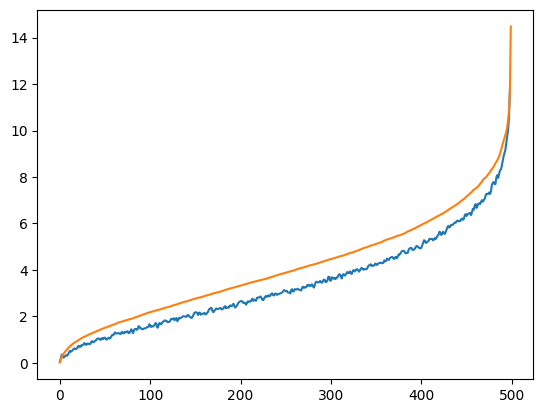

In [34]:
#k=8
ground_truth=[]
preds=[]
losses=[]
with torch.no_grad():
    for im_tst,speed_tst in test_dataloader:
    # Forward pass
        outputs_tst = model(im_tst.to(device))
        #loss2 = criterion(outputs_tst, speed_tst.to(device))
        out_vecs=[]
        for k in range(len(outputs_tst)):
            out = outputs_tst[k,:].cpu().detach().squeeze()
            #
            
            def rolling_mean(matrix, window):
                df = pd.DataFrame(matrix)
                return df.rolling(window=window).mean().dropna().to_numpy()
            out_mean = rolling_mean(out,2)
            out_mean[out_mean<0]=0.001
            out_vecs.append(out_mean)
       # losses.append(loss2.item())
        preds.append(out_vecs)
        ground_truth.append(speed_tst.numpy())
    # for i in out:
#     if (i>.03)&(count<400):
#         out[:,count
#     count+=1
plt.plot(out_mean)
plt.plot(speed_tst[k])

In [41]:
import timm
#timm.list_models()

In [ ]:
preds_mean = (preds1+preds2+preds3)
len(preds1[7])

In [ ]:
len(pred)
len(ground_truth[i][j,4:-3])
torch.tensor(pred)

In [36]:
len(preds)
losses=[]
full_preds=[]
criterion = nn.MSELoss()
#ground_truth[-1].shape
for i in range(len(preds)):
    for j in range(len(preds[i])):
        pred = preds[i][j]#(.00*preds1[i][j]+0.3*preds2[i][j]+.7*preds3[i][j])
        a,b,c = lognorm.fit(pred)

        xtorch= np.linspace(lognorm.ppf(0.01, a,b,c),
                        lognorm.ppf(0.99, a,b,c), target_length)
        distr_torch=lognorm.pdf(xtorch, a,b,c)
        #plt.plot(xtorch,distr_torch,c='r')
        
        a,b,c = lognorm.fit(ground_truth[i][j,:])
        xtorch= np.linspace(lognorm.ppf(0.01, a,b,c),
                        lognorm.ppf(0.99, a,b,c), target_length)
        distr_torch=lognorm.pdf(xtorch, a,b,c)
        #plt.plot(xtorch,distr_torch,c='g')
        #plt.xlim([0,30])
        #plt.ylim([0,.6])
        full_preds.append(pred)
        loss = criterion(torch.tensor(pred).squeeze(), torch.tensor(ground_truth[i][j,:-1]))
        losses.append(loss.item())
        #plt.title('Loss = '+str(loss.item()))
        #plt.show()
        
np.mean(losses)
#ground_truth[0].shape

3.662448542257211

Text(0.5, 1.0, 'Loss = 0.3535454836161208')

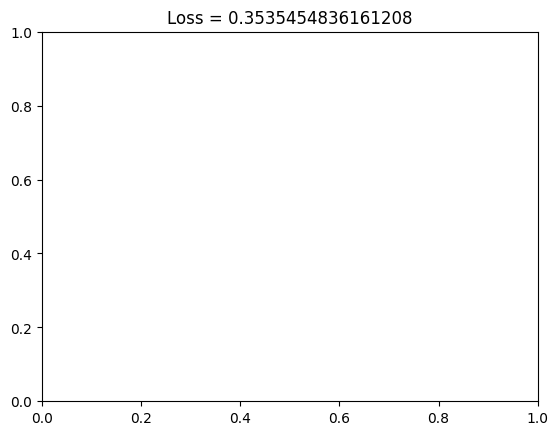

In [30]:
plt.title('Loss = '+str(loss.item()))

In [37]:
flat_pred = np.vstack(full_preds)
flat_pred=np.reshape(flat_pred,[-1,])
flat_pred.shape

(53393,)

In [38]:
flat_gt = np.vstack(ground_truth)
flat_gt=np.reshape(flat_gt,[-1,])
flat_gt.shape

(53500,)

In [23]:
torch.save(model.state_dict(), 'speed_model_Volo384_dispBrown_4_21_v2')

3.685992781400574
1.2760147961715662 -0.10267862144411118 2.512656606673119
3.7480136640376984
1.3607402 -0.07850582525063154 2.4657793


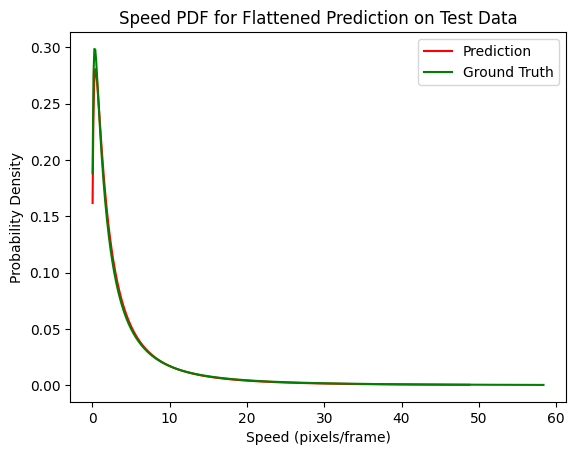

In [39]:
a,b,c = lognorm.fit(flat_pred)
#c=c+.4
#a=a+.1
# Generate points for plotting the fitted distribution
xtorch= np.linspace(lognorm.ppf(0.01, a,b,c),
                lognorm.ppf(0.99, a,b,c), target_length)

distr_torch=lognorm.pdf(xtorch, a,b,c)
print(a+b+c)
print(a,b,c)
# scales[i,:] = torch.tensor([a,b,c])
plt.plot(xtorch,distr_torch,c='r')

# a = (3*a_tst[k].cpu().detach().numpy()+a)/4
# b = (3*b_tst[k].cpu().detach().numpy()+b)/4
# c = (3*c_tst[k].cpu().detach().numpy()+c)/4
# print(a+b+c)
# print(a,b,c)
# xtorch= np.linspace(lognorm.ppf(0.01, a,b,c),
#                 lognorm.ppf(0.99, a,b,c), target_length)

# distr_torch=lognorm.pdf(xtorch, a,b,c)
# print(a,b,c)
# # scales[i,:] = torch.tensor([a,b,c])
# plt.plot(xtorch,distr_torch,c='b')

a,b,c = lognorm.fit(flat_gt)
    
# Generate points for plotting the fitted distribution
xtorch= np.linspace(lognorm.ppf(0.01, a,b,c),
                lognorm.ppf(0.99, a,b,c), target_length)

distr_torch=lognorm.pdf(xtorch, a,b,c)
print(a+b+c)
print(a,b,c)

# scales[i,:] = torch.tensor([a,b,c])
plt.plot(xtorch,distr_torch,c='g')
plt.title('Speed PDF for Flattened Prediction on Test Data')
plt.xlabel('Speed (pixels/frame)')
plt.ylabel('Probability Density')
plt.legend(['Prediction', 'Ground Truth'])


In [ ]:
(a_tst[k].cpu().detach().numpy()+a)/2

In [ ]:
(b_tst[k].cpu().detach().numpy()+b)/2

In [ ]:
(c_tst[k].cpu().detach().numpy()+c)/2

In [ ]:
# [ 1.2188,  0.0247, 11.8741]
# [1.2127, 0.0080, 6.0299]
# [1.2127, 0.0316, 6.0299]
s1 = scale_tst[:,0]#*1.2127
s2 = scale_tst[:,1]#*0.0316
s3 = scale_tst[:,2]#*6.0299

out1 = outputs_tst.cpu().detach().numpy()[:,0]#*1.2127
out2 = outputs_tst.cpu().detach().numpy()[:,1]#*0.0316
out3 = outputs_tst.cpu().detach().numpy()[:,2]#*6.0299


In [ ]:
k=0
x_shape= torch.tensor(np.linspace(lognorm.ppf(0.01, out1[k], out2[k], out3[k]),
                    lognorm.ppf(0.99,  out1[k], out2[k], out3[k]), 100))

x_distr=torch.tensor(lognorm.pdf(x_shape,  out1[k], out2[k], out3[k]))

In [ ]:
x_shape_or= torch.tensor(np.linspace(lognorm.ppf(0.01, s1[k], s2[k], s3[k]),
                    lognorm.ppf(0.99,  s1[k], s2[k], s3[k]), 100))

x_distr_or=torch.tensor(lognorm.pdf(x_shape,  s1[k], s2[k], s3[k]))

In [ ]:
plt.scatter(x_shape,x_distr)
plt.scatter(x_shape_or,x_distr_or)

In [ ]:
plt.scatter(xt.cpu().detach().numpy(),lab.cpu().detach().numpy())
plt.scatter(outputs[0].cpu().detach().numpy(),outputs[1].cpu().detach().numpy())

In [ ]:
torch.save(model.state_dict(), 'weights_3_9_2')

In [ ]:
dataset_test = CustomDataset(images3, coords_test)
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=True)
model.eval()
running_loss2=0
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        #labels= labels.to(device)
        #lab = torch.mean(lab, dim=(2,3)).squeeze()

        outp = model(inputs)  
        test_loss = criterion(outp, labels.to(device))
        running_loss2 += test_loss.item()
epoch_loss2 = running_loss2 / len(test_dataloader)
epoch_loss2

In [ ]:
# next(iter(dataloader))
ina.shape

In [ ]:
outp



In [ ]:
for i in range(672):
    print(torch.nan_to_num(xc_data[0:14,i]))

In [ ]:
np_out = np.array(outp.cpu().detach())
np_out[np_out<=20]=np.nan
np_out.shape


In [ ]:
np_lab = np.array(labels.detach())
np_lab[np_lab==0]=np.nan


In [ ]:
np_lab

In [ ]:
for i in range(np_out.shape[0]):
    plt.scatter(np_out[i,:,0],np_out[i,:,1])

In [ ]:
for i in range(np_lab.shape[0]):
    plt.scatter(np_lab[i,:,0],np_lab[i,:,1])

In [ ]:
for i in range(np_lab.shape[1]):
    plt.plot(np_lab[:,i,0],np_lab[:,i,1])

In [ ]:
for i in range(np_out.shape[1]):
    plt.plot(np_out[:,i,0],np_out[:,i,1])

In [ ]:
plt.plot(np_lab[:,i,0],np_lab[:,i,1])
plt.plot(np_out[:,i,0],np_out[:,i,1])

In [ ]:
np_out[:,i,0]

In [ ]:
np_out[:,i,1]

In [ ]:
lab[:,0,0]